## Команда 7,  кейс 7 

## "Бинарная классификация отказов оборудования"

Краткое описание кейса:  
Нужно предсказать, произойдёт ли отказ оборудования на основе его технических характеристик, условий эксплуатации и истории работы

Ожидаемый результат:
- Обученная модель бинарной классификации, определяющая вероятность отказа оборудования

Основной функционал:
- Импорт и анализ исторических данных
- Предобработка и очистка данных
- Обучение модели (SVM, деревья решений)
- Оценка метрик Precision, Recall, ROC-AUC

Состав команды и роли:
- Елена Сергеева - Project Manager
- Раиль Фахртдинов - Data Analyst
- Оксана Дергачева - Data Analyst
- Артур Халимов - Data Analyst
- Александр Новиков - ML Engineer
- Виталий Миляков - ML Engineer

## Введение

Изучаемый в данной работе датасет представляет собой данные телеметрии промышленного оборудования, собранные с датчиков мониторинга. Каждая строка соответствует состоянию оборудования в определенный момент времени с показаниями различных сенсоров.

Датасет включает 14 признаков.

Источник: https://www.kaggle.com/competitions/playground-series-s3e17/data

## Описание признаков

**1. id - Уникальный идентификатор**

Тип: Числовой

Описание: Порядковый номер записи в датасете


**2. Product ID - Идентификатор оборудования**

Тип: Строковый (категориальный)

Формат: Буква + 5 цифр (пример: L50096, M20343)

Описание: Уникальный серийный номер единицы оборудования

Назначение: Идентификация конкретного экземпляра оборудования

**3. Type - Тип оборудования**

Тип: Категориальный

Значения: H, L, M (разные модификации/классы)

Описание: Классификация оборудования по типам или моделям

Назначение: Учет конструктивных особенностей разных типов

**4. Air temperature [K] - Температура окружающего воздуха**
   
Тип: Числовой, непрерывный

Единица: Кельвины (K)

Диапазон: приблизительно 298-303 K (25-30°C)

Описание: Температура воздуха в рабочей зоне оборудования

Назначение: Мониторинг условий эксплуатации

**5. Process temperature [K] - Температура процесса**

Тип: Числовой, непрерывный

Единица: Кельвины (K)

Диапазон: приблизительно 308-313 K (35-40°C)

Описание: Температура непосредственно в рабочем процессе

Назначение: Контроль теплового режима работы

**6. Rotational speed [rpm] - Скорость вращения**
   
Тип: Числовой, непрерывный

Единица: Обороты в минуту (rpm)

Диапазон: приблизительно 1400-2900 об/мин

Описание: Скорость вращения деталей оборудования

Назначение: Мониторинг рабочих режимов

**7. Torque [Nm] - Крутящий момент**

Тип: Числовой, непрерывный

Единица: Ньютон-метры (Nm)

Диапазон: приблизительно 4-77 Nm

Описание: Сила вращения, создаваемая оборудованием

Назначение: Контроль механической нагрузки

**8. Tool wear [min] - Cтойкость инструмента (Износ)**

Тип: Числовой, непрерывный

Единица: Минуты машинного времени (min)

Диапазон: 0-253 минуты машинного времени 

(максимальная - 270 минут у сверл, у фрез до 240, развертки - 120 мин, резцы - 90 мин)


**9. Machine failure - Факт отказа оборудования**

Тип: Бинарный (0/1)

Значения:

0 - оборудование работает нормально

1 - произошел отказ оборудования

Описание: Основная целевая переменная для бинарной классификации

Назначение: Общий индикатор неисправности

**10. TWF - Отказ из-за износа инструмента**

Тип: Бинарный (0/1)

Расшифровка: Tool Wear Failure

Описание: Отказ, вызванный чрезмерным износом рабочего инструмента

Связь: Зависит от параметра Tool wear [min]

**11. HDF - Отказ системы теплорассеивания**

Тип: Бинарный (0/1)

Расшифровка: Heat Dissipation Failure

Описание: Неисправность системы охлаждения или теплоотвода

Связь: Зависит от температурных параметров

**12. PWF - Отказ электропитания**

Тип: Бинарный (0/1)

Расшифровка: Power Failure

Описание: Проблемы с подачей электроэнергии к оборудованию

Связь: Может проявляться в скачках параметров работы

**13. OSF - Отказ из-за перегрузки**

Тип: Бинарный (0/1)

Расшифровка: Overstrain Failure

Описание: Механический отказ вследствие превышения допустимых нагрузок

Связь: Зависит от Torque и Rotational speed

**14. RNF - Случайный отказ**

Тип: Бинарный (0/1)

Расшифровка: Random Failure

Описание: Непредсказуемые отказы, не связанные с другими конкретными причинами

Связь: Сложно предсказуем по имеющимся параметрам

## Ход работы
1. Загрузка данных и изучение общей информации
2. Предобработка данных
3. Проведение исследовательского анализа данных
4. Общий вывод по результатам исследования
5. Построение модели логистической регрессии

## 1. Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import phik
from phik.report import plot_correlation_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_predict
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Добавим настройки отображения
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')

In [3]:
# Загрузка данных
data = pd.read_csv("train.csv")
# data = pd.read_csv("./data/train.csv")

# Получим первых 20 строк данных
data.head(20)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
5,5,M24300,M,298.4,308.9,1429,42.1,65,0,0,0,0,0,0
6,6,L56736,L,299.6,311.0,1413,42.9,156,0,0,0,0,0,0
7,7,L55488,L,298.7,310.1,1609,38.1,67,0,0,0,0,0,0
8,8,L56397,L,297.7,308.8,1578,35.2,13,0,0,0,0,0,0
9,9,L55067,L,300.5,312.3,1447,53.3,98,0,0,0,0,0,0


In [4]:
# Получим общую информацию о данных в таблице data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

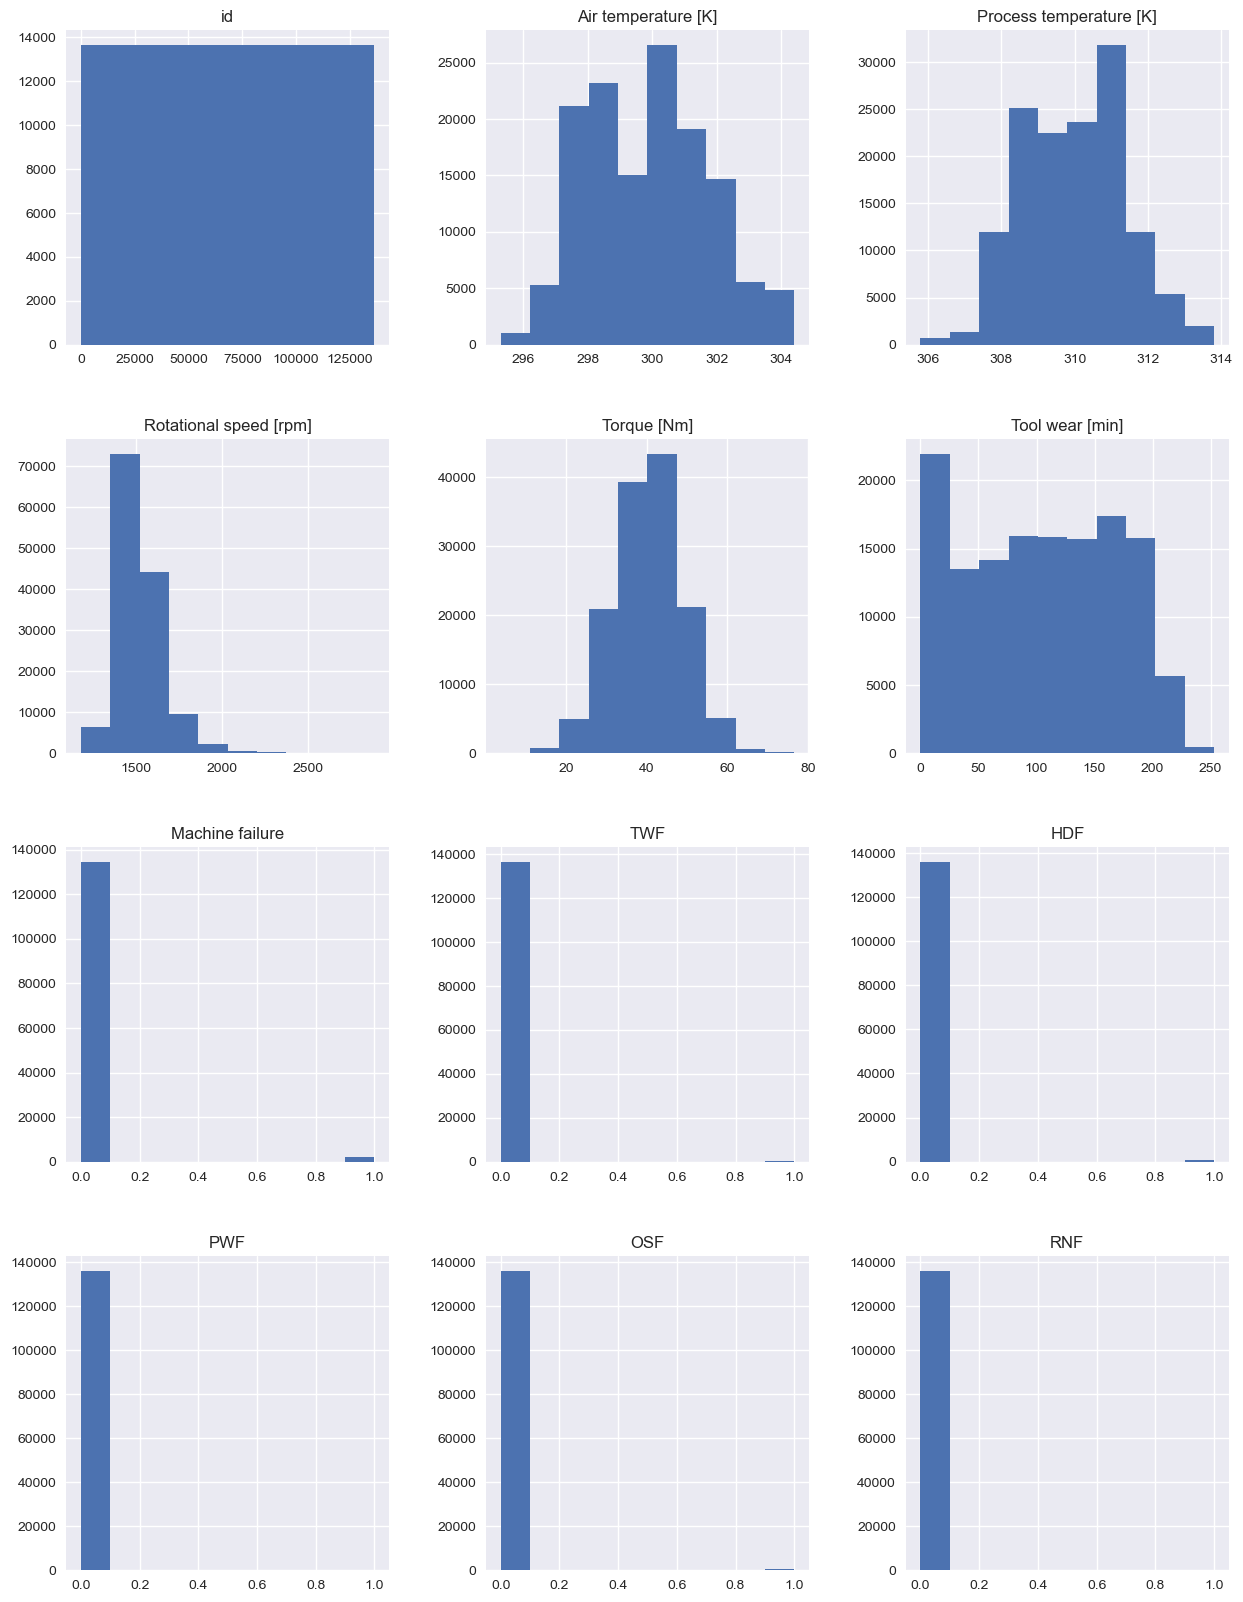

In [5]:
# Построим гистограммы для всех числовых столбцов таблицы на одном графике
data.hist(figsize=(15, 20))
plt.show()

In [6]:
# Произведем проверку данных на наличие явных дубликатов
data.duplicated().sum()

np.int64(0)

In [7]:
# Произведем проверку данных на наличие пропусков
data.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

**Выводы по шагу 1 "Загрузка и изучение общей информации":**

Из общей информации о данных известно, что в датасете 136429 записей.

Предварительно можно утверждать, что данных достаточно для проверки гипотез.

Пропусков в данных нет.

Явные дубликаты отсутствуют.

## 2. Предобработка данных

In [8]:
# Переименуем столбцы в соответсвии с 'best practices'
data.rename(columns={
    'Product ID': 'product_id',
    'Type': 'type',
    'Air temperature [K]': 'air_temperature_k',
    'Process temperature [K]': 'process_temperature_k', 
    'Rotational speed [rpm]': 'rotational_speed_rpm',
    'Torque [Nm]': 'torque_nm',
    'Tool wear [min]': 'tool_wear_min',
    'Machine failure': 'machine_failure',
    'TWF': 'tool_wear_failure',
    'HDF': 'heat_dissipation_failure',
    'PWF': 'power_failure',
    'OSF': 'overstrain_failure',
    'RNF': 'random_failure'     
}, inplace=True)

In [9]:
# Рассмотрим типы данных в каждом столбце
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        136429 non-null  int64  
 1   product_id                136429 non-null  object 
 2   type                      136429 non-null  object 
 3   air_temperature_k         136429 non-null  float64
 4   process_temperature_k     136429 non-null  float64
 5   rotational_speed_rpm      136429 non-null  int64  
 6   torque_nm                 136429 non-null  float64
 7   tool_wear_min             136429 non-null  int64  
 8   machine_failure           136429 non-null  int64  
 9   tool_wear_failure         136429 non-null  int64  
 10  heat_dissipation_failure  136429 non-null  int64  
 11  power_failure             136429 non-null  int64  
 12  overstrain_failure        136429 non-null  int64  
 13  random_failure            136429 non-null  i

In [10]:
# 1. Удаляем id и Product ID
cols_to_drop = ["id", "product_id"]
data.drop(columns=[c for c in cols_to_drop if c in data.columns], inplace=True)

# 2. Type -> категориальный
data["type"] = data["type"].astype("category")

# 3. Бинарные признаки -> int8
binary_cols = ["machine_failure", "tool_wear_failure", "heat_dissipation_failure", "power_failure", "overstrain_failure", "random_failure"]
existing_binary_cols = [c for c in binary_cols if c in data.columns]
data[existing_binary_cols] = data[existing_binary_cols].astype("int8")

# 4. Числовые признаки -> float32
numeric_cols = [
    "air_temperature_k",
    "process_temperature_k",
    "rotational_speed_rpm",
    "torque_nm",
    "tool_wear_min",
]
existing_num_cols = [c for c in numeric_cols if c in data.columns]

data[existing_num_cols] = data[existing_num_cols].astype("float32")

In [11]:
# Рассмотрим типы данных в каждом столбце после преобразования
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   type                      136429 non-null  category
 1   air_temperature_k         136429 non-null  float32 
 2   process_temperature_k     136429 non-null  float32 
 3   rotational_speed_rpm      136429 non-null  float32 
 4   torque_nm                 136429 non-null  float32 
 5   tool_wear_min             136429 non-null  float32 
 6   machine_failure           136429 non-null  int8    
 7   tool_wear_failure         136429 non-null  int8    
 8   heat_dissipation_failure  136429 non-null  int8    
 9   power_failure             136429 non-null  int8    
 10  overstrain_failure        136429 non-null  int8    
 11  random_failure            136429 non-null  int8    
dtypes: category(1), float32(5), int8(6)
memory usage: 3.5 MB


## 3. Проведение исследовательского анализа данных

### 3.1. Изучение основных параметров датасета

In [12]:
# Посмотрим на распределение значений в данных
data.describe()

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,tool_wear_failure,heat_dissipation_failure,power_failure,overstrain_failure,random_failure
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,299.862793,309.941040,1520.331055,40.348644,104.408905,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,1.862511,1.385293,138.737717,8.501970,63.966579,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,295.299988,305.799988,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,298.299988,308.700012,1432.000000,34.599998,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.000000,310.000000,1493.000000,40.400002,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,301.200012,310.899994,1580.000000,46.099998,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,304.399994,313.799988,2886.000000,76.599998,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Оценим баланс целевой переменной
print("Распределение целевой переменной:")
print(data['machine_failure'].value_counts(normalize=True))

Распределение целевой переменной:
machine_failure
0    0.984256
1    0.015744
Name: proportion, dtype: float64


In [14]:
# Анализ типов оборудования
print("Распределение по типам оборудования:")
print(data['type'].value_counts())

Распределение по типам оборудования:
type
L    95354
M    32152
H     8923
Name: count, dtype: int64


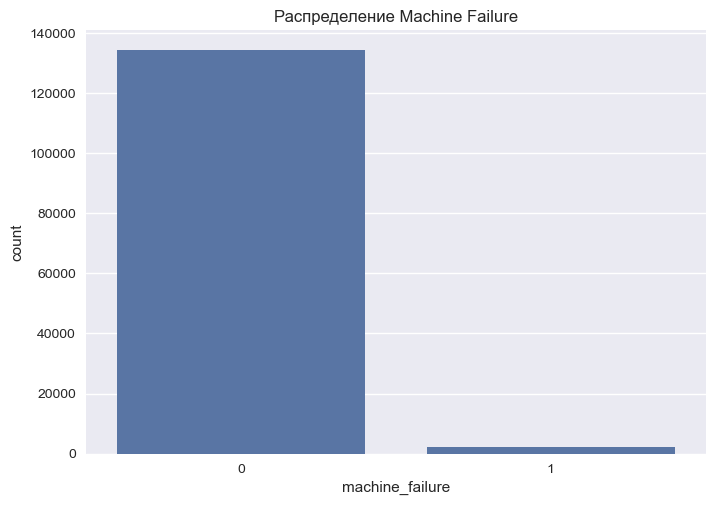

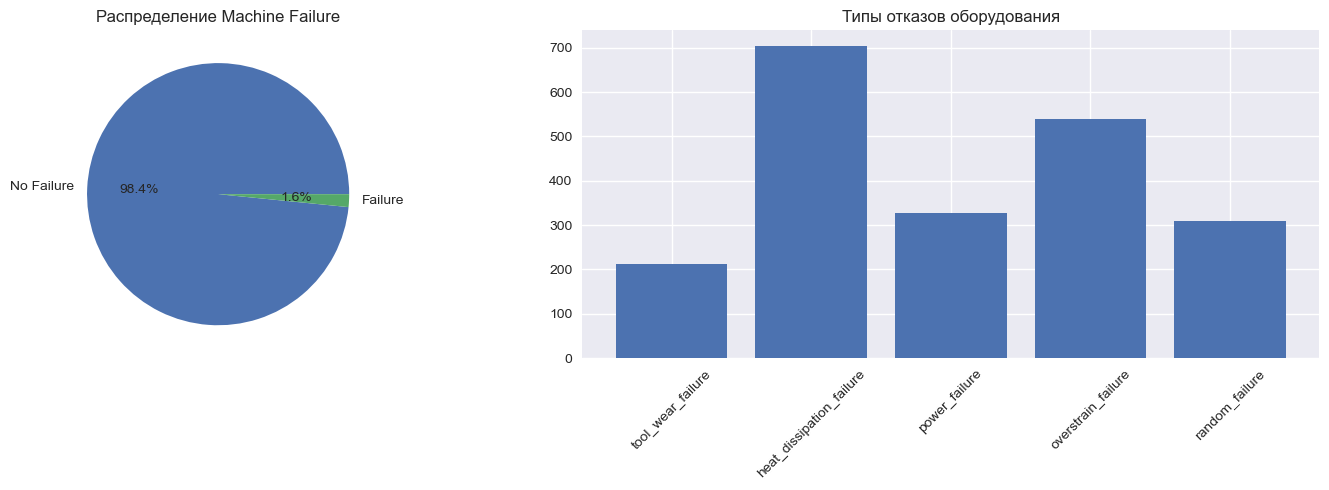

Статистика отказов:
Общее количество отказов: 2148
Процент отказов: 1.57%

Распределение по типам отказов:
tool_wear_failure: 212 случаев (0.16%)
heat_dissipation_failure: 704 случаев (0.52%)
power_failure: 327 случаев (0.24%)
overstrain_failure: 540 случаев (0.40%)
random_failure: 308 случаев (0.23%)


In [15]:
# Проведем анализ основного таргета - Machine failure
sns.countplot(data=data,x='machine_failure')
plt.title('Распределение Machine Failure')
plt.show()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
failure_counts = data['machine_failure'].value_counts()
plt.pie(failure_counts.values, labels=['No Failure', 'Failure'], autopct='%1.1f%%')
plt.title('Распределение Machine Failure')

plt.subplot(1, 2, 2)
failure_types = data[["tool_wear_failure", "heat_dissipation_failure", "power_failure", "overstrain_failure", "random_failure"]].sum()
plt.bar(failure_types.index, failure_types.values)
plt.title('Типы отказов оборудования')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Рассмотрим статистику по типам отказов оборудования
print("Статистика отказов:")
print(f"Общее количество отказов: {data['machine_failure'].sum()}")
print(f"Процент отказов: {data['machine_failure'].mean()*100:.2f}%")
print("\nРаспределение по типам отказов:")
for col in ["tool_wear_failure", "heat_dissipation_failure", "power_failure", "overstrain_failure", "random_failure"]:
    print(f"{col}: {data[col].sum()} случаев ({data[col].mean()*100:.2f}%)")

**Можно сделать предварительный вывод**:


**Сильный дисбаланс классов machine_failure**: только около 1.57% наблюдений имеют отказы оборудования


**Анализ основных признаков:**

**Температуры:**

air_temperature_k: 295.3K - 304.4K (диапазон ~9K)

process_temperature_k: 305.8K - 313.8K (диапазон ~8K)

Процесс всегда горячее воздуха (логично)

Распределения довольно узкие (std ~1.8-1.4)

**Механические параметры:**

rotational_speed_rpm: 1181 - 2886 (довольно широкий разброс)

torque_nm: 3.8 - 76.6 (широкий диапазон)

tool_wear_min: 0 - 253 минуты (полный цикл износа инструмента)

** Потенциальные выбросы:**

rotational_speed_rpm: max = 2886, в то время как 75% = 1580

Возможно, есть экстремальные режимы работы - нужно проверить на boxplot'ах

**Редкие события (failure modes):**

Все типы отказов очень редкие:

TWF: 0.15% (Tool Wear Failure)

HDF: 0.52% (Heat Dissipation Failure)

PWF: 0.24% (Power Failure)

OSF: 0.40% (Overstrain Failure)

RNF: 0.23% (Random Failures)

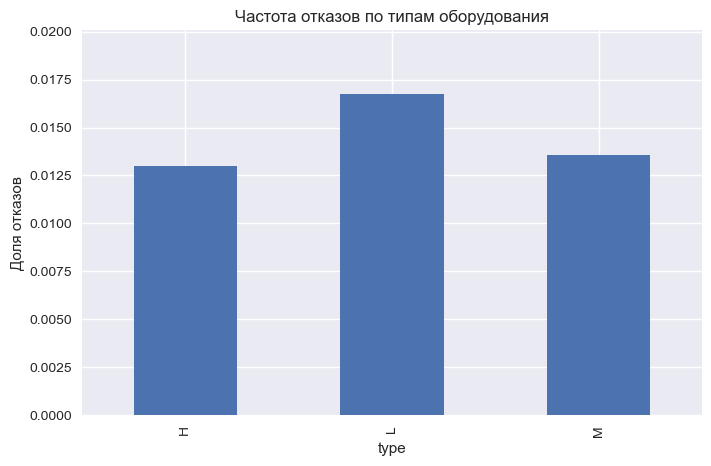

In [16]:
# Проанализируем частоту отказов по типам оборудования
failure_rate = data.groupby("type", observed=True)["machine_failure"].mean()

failure_rate.plot(kind="bar", figsize=(8,5))
plt.title("Частота отказов по типам оборудования")
plt.ylabel("Доля отказов")
plt.ylim(0, failure_rate.max() * 1.2)
plt.show()

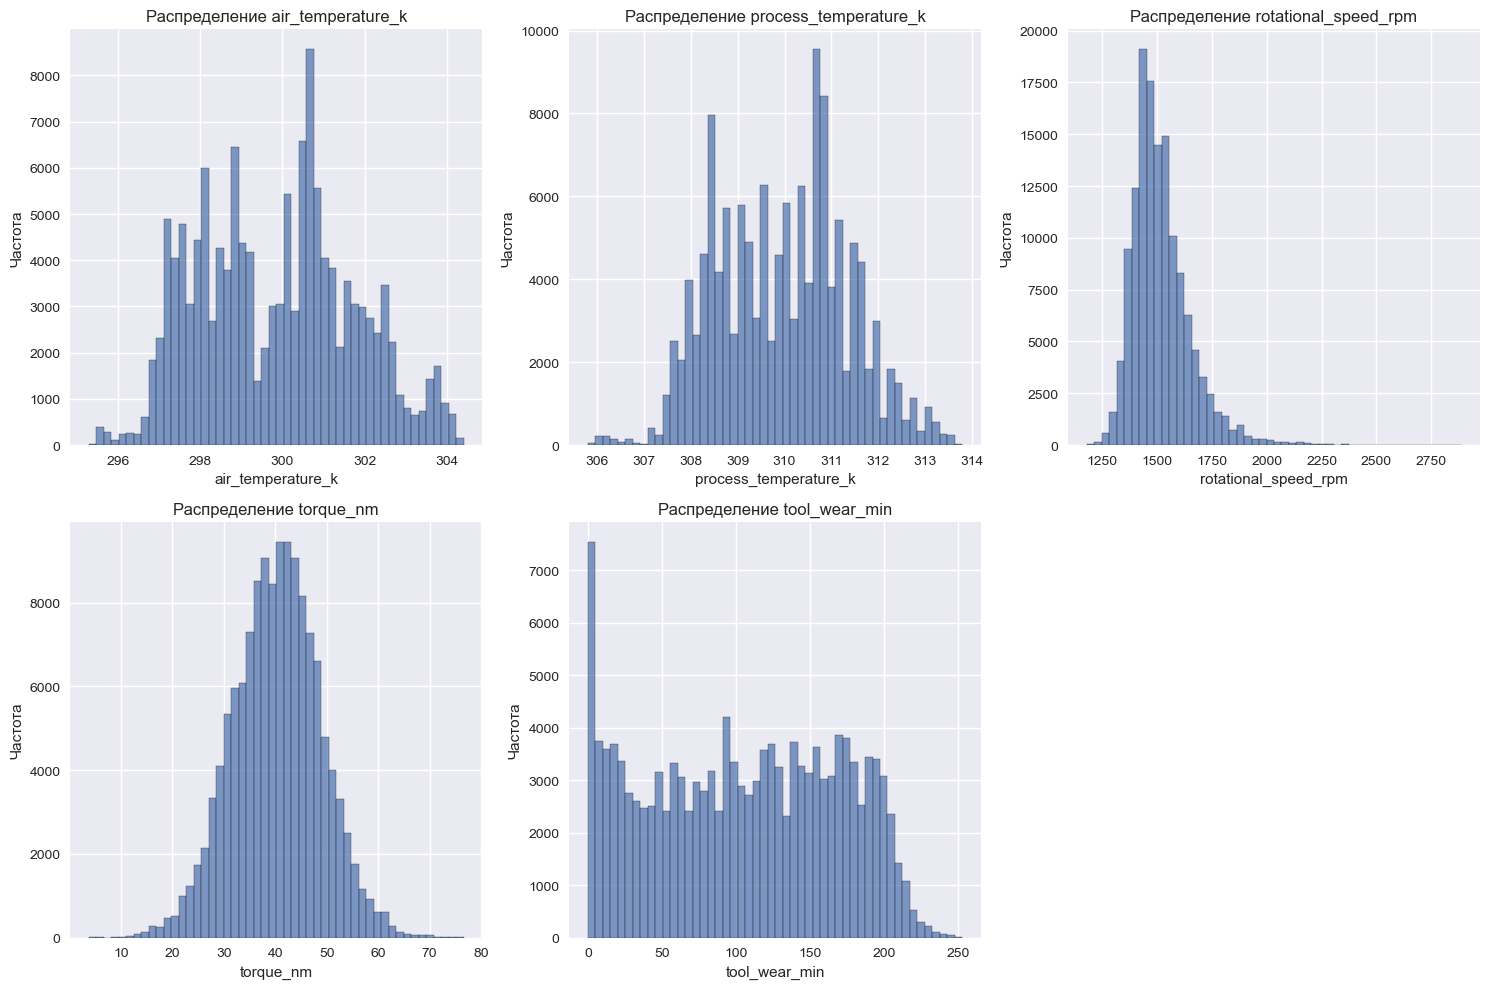

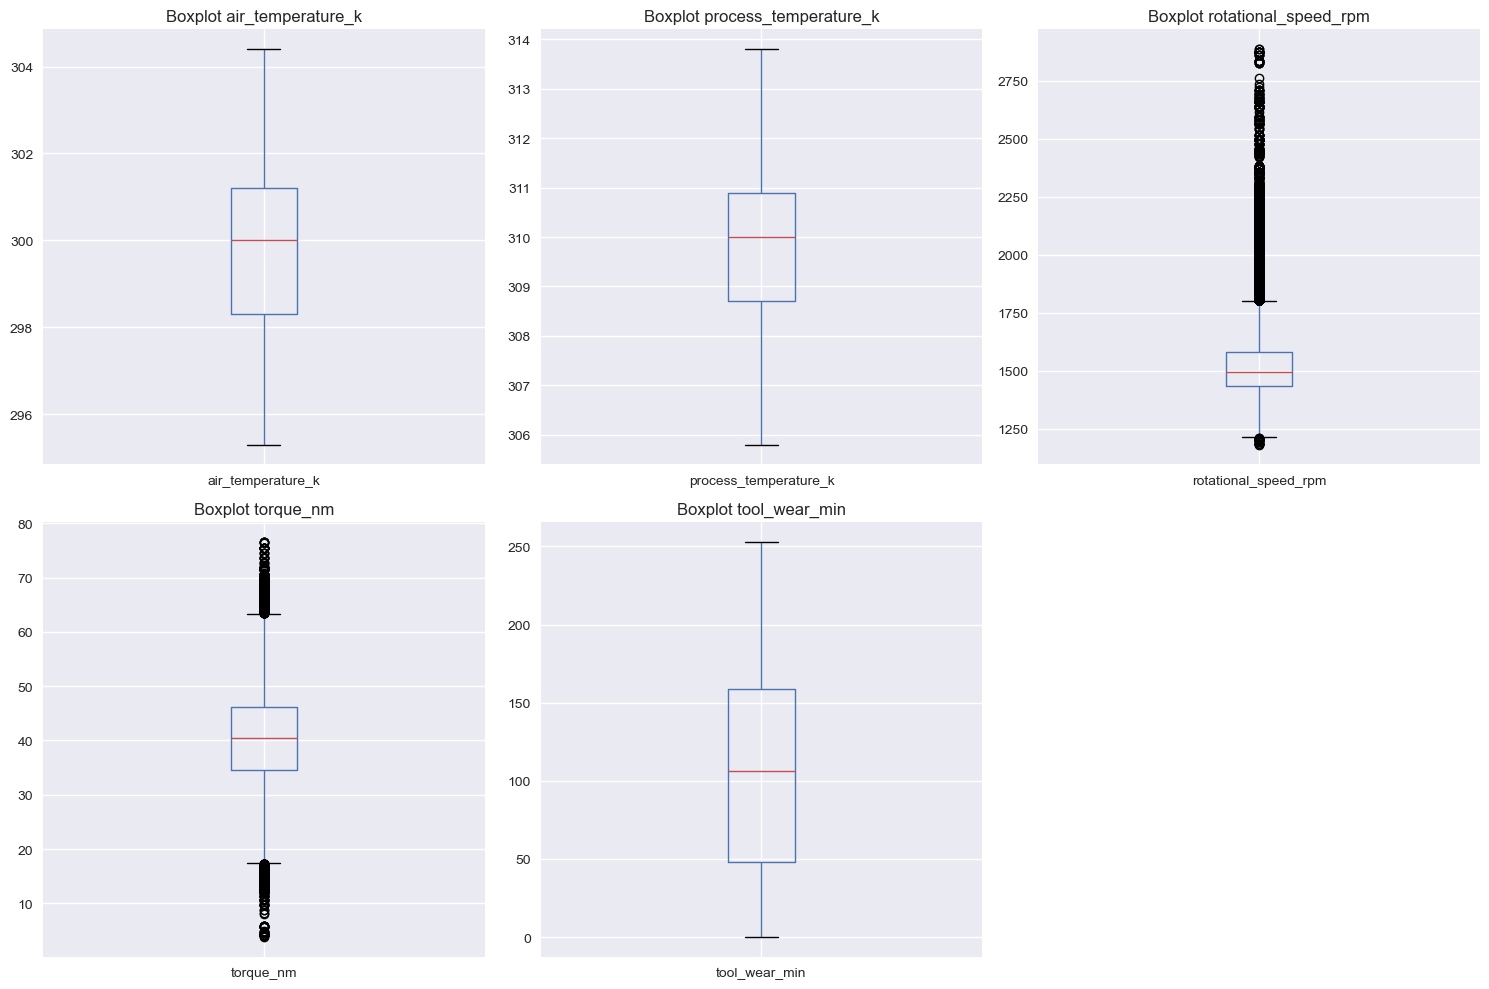

In [17]:
# Построим гистограммы числовых признаков
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    axes[i].hist(data[col], bins=50, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')

# Удаляем пустой subplot
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

# Построим Boxplots для выявления выбросов
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    data.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot {col}')

fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

**Анализ гистограмм:**

**1. Температурные параметры:**
   
**air_temperature_k:** Нормальное распределение с центром ~300K

**process_temperature_k:** Также нормальное распределение, смещенное относительно температуры воздуха (центр ~310K)

Вывод: Оба параметра имеют стабильные, предсказуемые распределения


**2. Механические параметры:**
   
**rotational_speed_rpm:** Мультимодальное распределение с несколькими пиками

Практически симметричное распределение без выбросов.  
По диапазону скорости вращения от 1250 до 2250 об/мин можно предеположить, что это оборудование 
средней и высокой скорости вращения, например, токарные или фрезерные станки, насосы. 
По моде 1500 об/мин можно судить о большом количестве электродвигателей асинхронного типа 
с четырьмя полюсами и частотой сети 50 Гц и ном. скоростью вращения 1500 об/мин, которые применяются во многих промышленных приводах. 
Плавно ниспадающий график при увеличении частоты вращения может говорить о применении ЧРП.


**torque_nm:** Распределение близко к нормальному с центром ~40 Нм
  
Симметричное распределение без выбросов. 
Момент и скорость вращения взаимосвязанные величины. 
Поэтому выводы по анализу графика момента схожи с анализом графика скорости вращения

**3. tool_wear_min:**
Равномерное распределение по всему диапазону (0-250 минут)

Не выходит за пределы стандарта по стойкости инструмента, это может означать , 
что изношенный инструмент не эксплуатируется. Выброс от 0 до 5 минут может говорить о значительном кол-ве инструмента после замены, 
т.е новый. После значения 200 частота параметра стойкости снижается, хотя  предел, требуемый по стандарту не превышен. 
Это может говорить, что на предприятии следят за износом инструмена и заменяют его раньше достижения максимального порога стойкости


**Анализ boxplots:**

**Температуры:**
Данные "чистые" и стабильные

**rotational_speed_rpm:**
Значительное количество значений "за усами" в обе стороны, могут быть ключевыми для предсказания отказов

**torque_nm:**
Умеренное количество значений за усами в обе стороны.
Могут указывать на аномальные режимы работы

**tool_wear_failure:**
Выбросов нет.
Можно сделать предположение, что износ инструмента прогрессирует предсказуемо

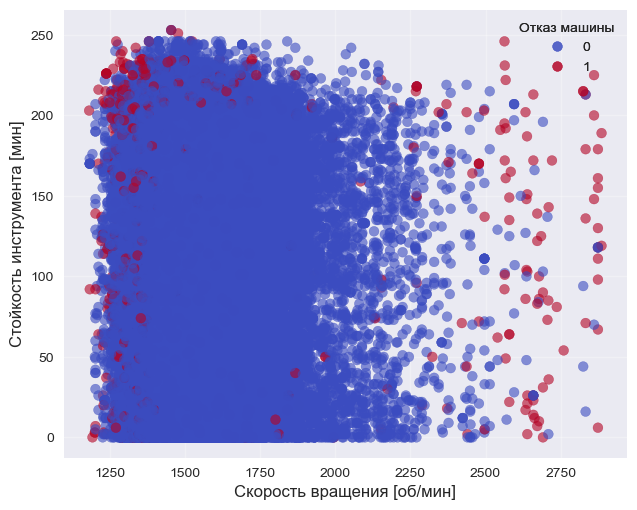

In [18]:
# График зависимости стойкости от скорости вращения

# Создаем сетку графиков
fig = plt.figure(figsize=(10, 8))
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.5)

# Основной scatter plot
ax_main = fig.add_subplot(grid[1:4, 0:3])
scatter = ax_main.scatter(
    data['rotational_speed_rpm'], 
    data['tool_wear_min'],
    c=data['machine_failure'],
    cmap='coolwarm',
    alpha=0.6,
    s=50
)
ax_main.set_xlabel('Скорость вращения [об/мин]', fontsize=12)
ax_main.set_ylabel('Стойкость инструмента [мин]', fontsize=12)
ax_main.grid(True, alpha=0.3)

# Добавляем цветовую легенду
legend = ax_main.legend(*scatter.legend_elements(), 
                       title="Отказ машины", 
                       loc="upper right")
ax_main.add_artist(legend)

plt.tight_layout()
plt.show()

Вывод: отказы происходят при работе на высоких оборотах (2000-2500 об/мин) и преимущественно с сильно изношенным инструментом (150-250 мин)

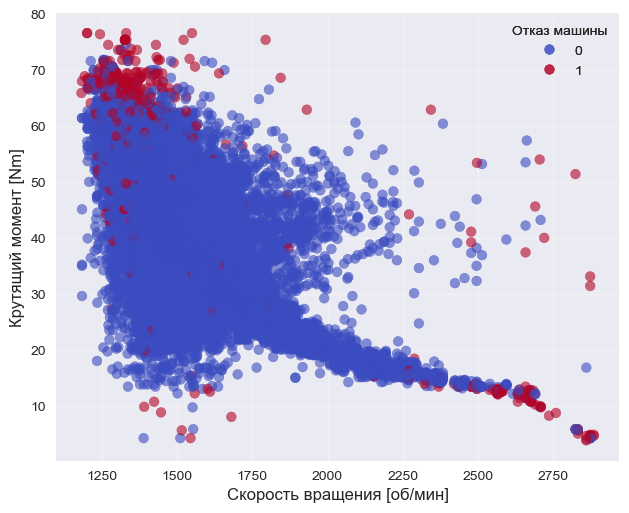

In [19]:
# График зависимости Крутящий момента и скорости вращения

# Создаем сетку графиков
fig = plt.figure(figsize=(10, 8))
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.5)

# Основной scatter plot
ax_main = fig.add_subplot(grid[1:4, 0:3])
scatter = ax_main.scatter(
    data['rotational_speed_rpm'], 
    data['torque_nm'],
    c=data['machine_failure'],
    cmap='coolwarm',
    alpha=0.6,
    s=50
)
ax_main.set_xlabel('Скорость вращения [об/мин]', fontsize=12)
ax_main.set_ylabel('Крутящий момент [Nm]', fontsize=12)
ax_main.grid(True, alpha=0.3)

# Добавляем цветовую легенду
legend = ax_main.legend(*scatter.legend_elements(), 
                       title="Отказ машины", 
                       loc="upper right")
ax_main.add_artist(legend)

plt.tight_layout()
plt.show()

Вывод: 
Режимы "низкий крутящий момент/высокая скорость" и "высокий крутящий момент/низкая скорость" могут приводить к разрушению внутренних элементов оборудования, в связи с чем произойдет его отказ

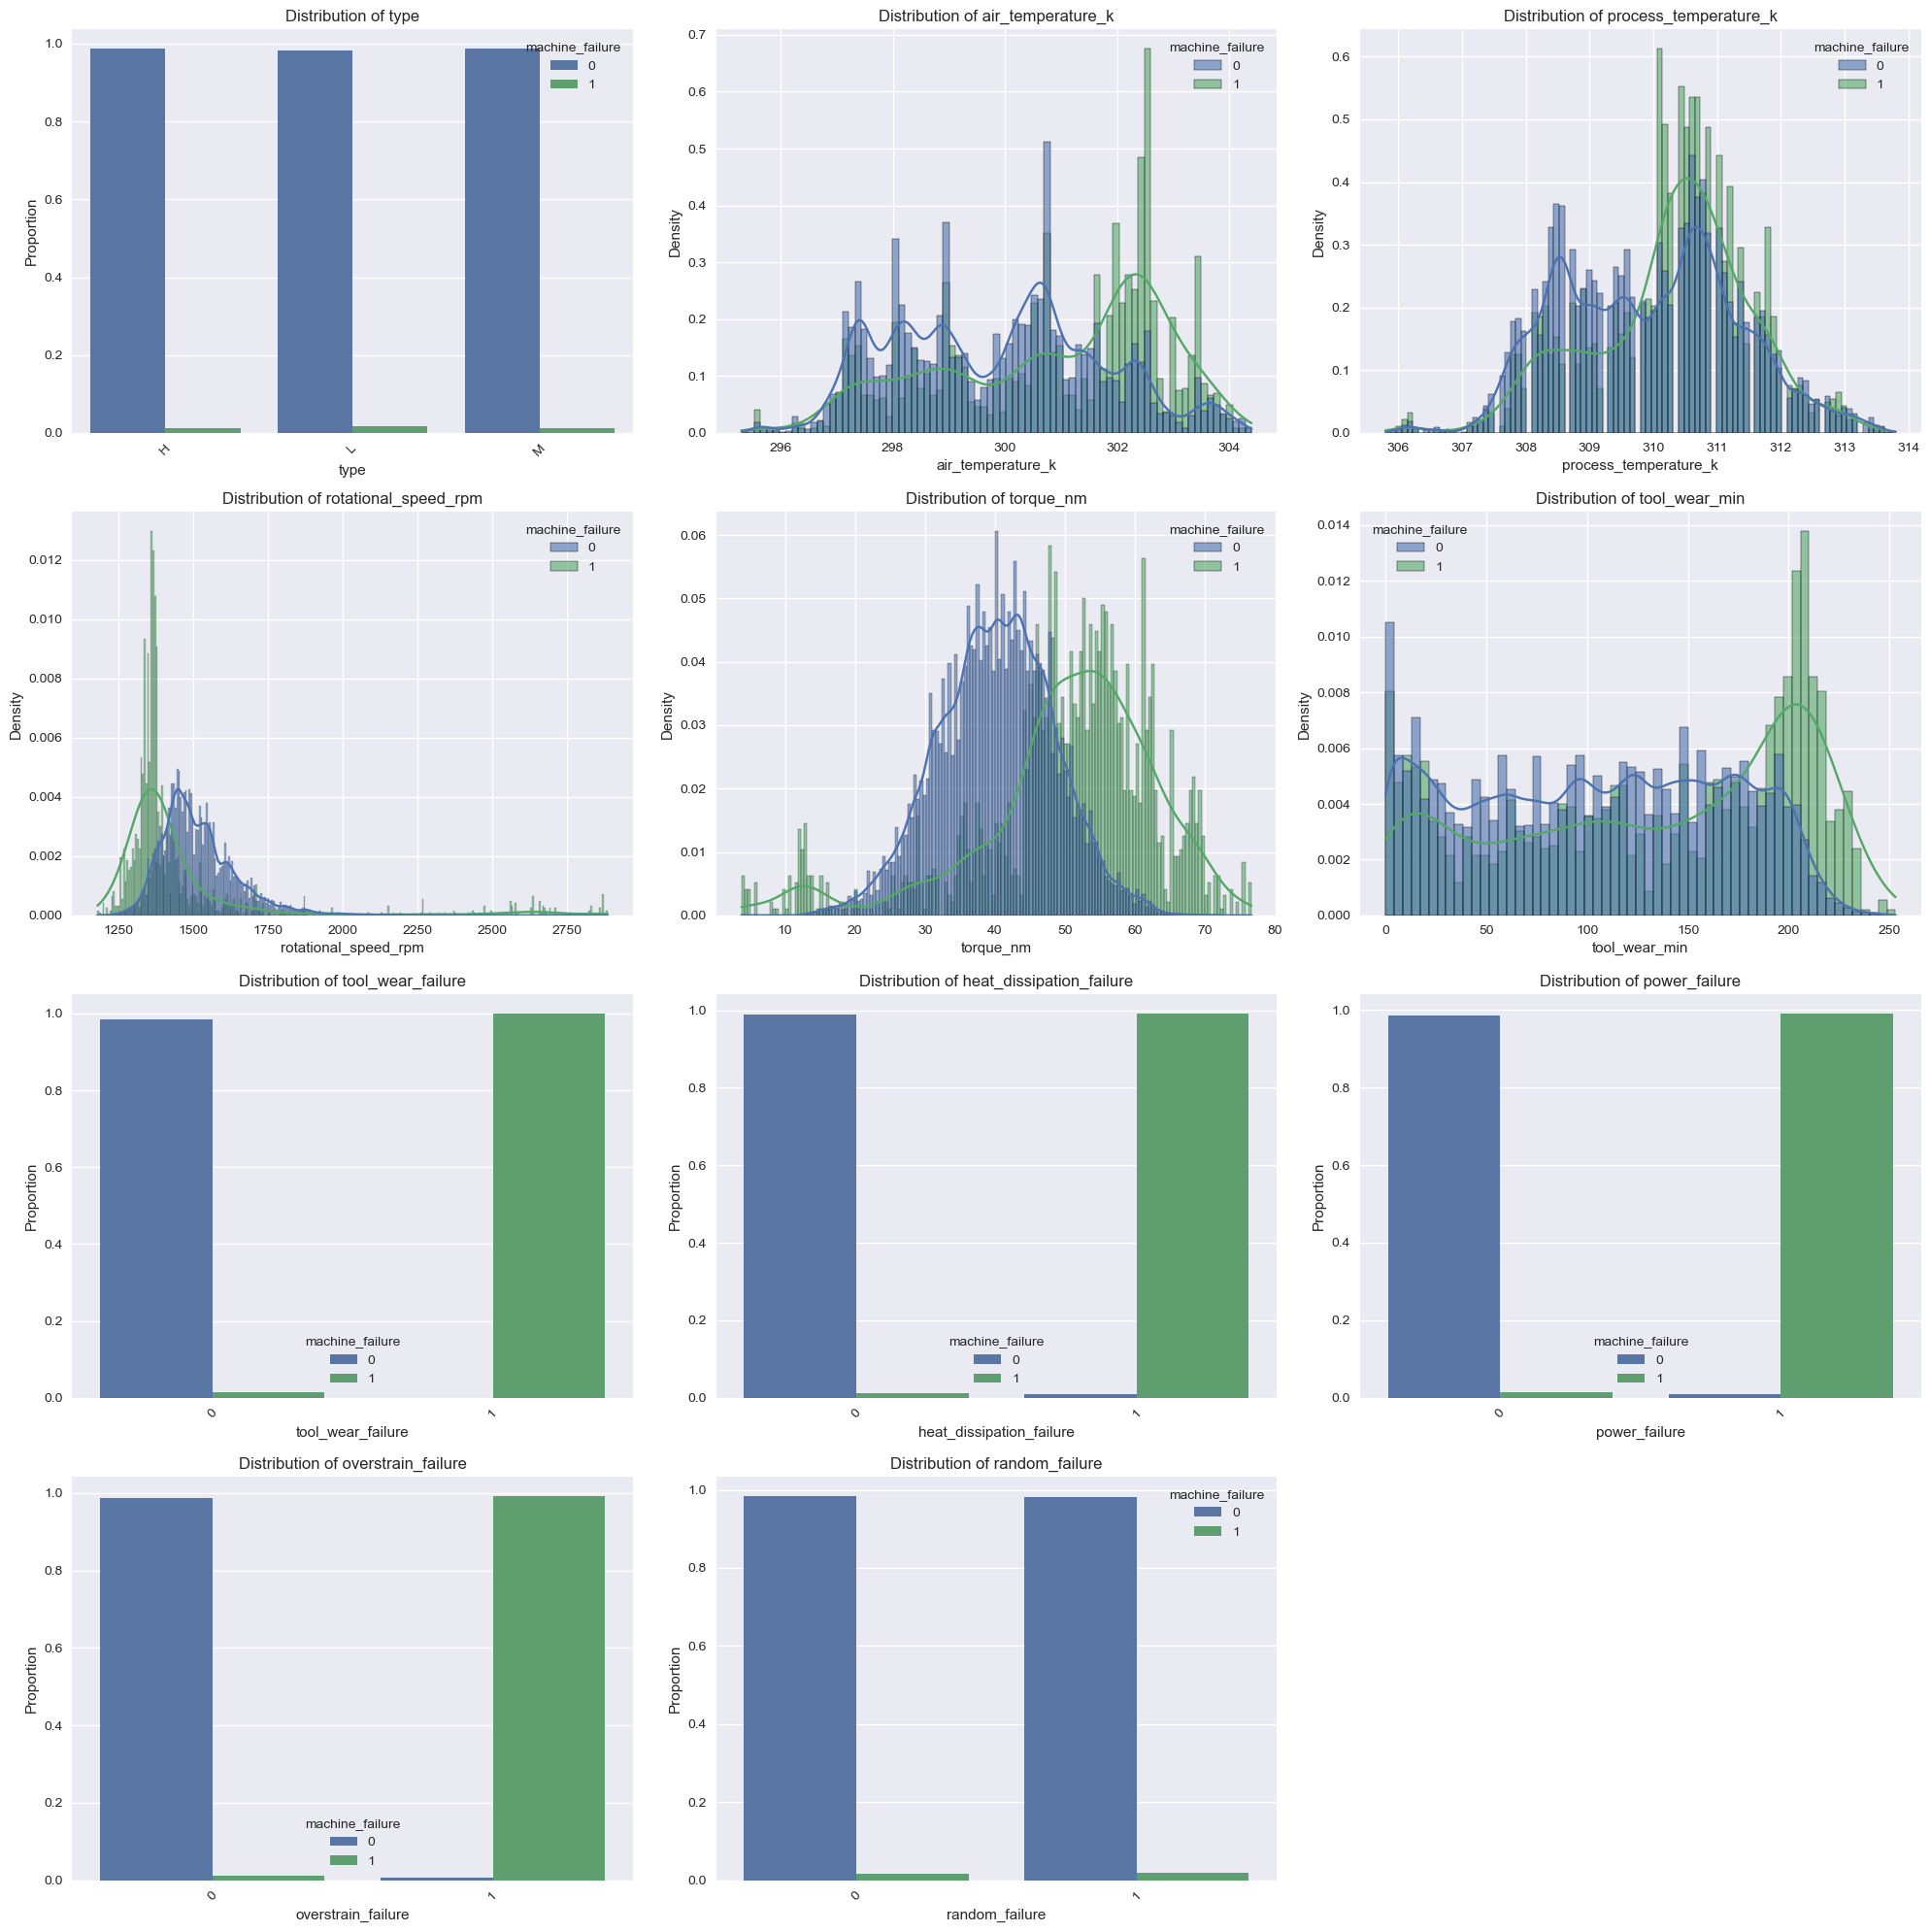

In [20]:
# Проведем анализ распределений признаков в зависимости от целевой переменной

# Обязательно нормируем гистрограммы:
# stat='density' - показывает плотность вероятности (площадь под гистограммой = 1)
# common_norm=False - каждая группа нормируется отдельно

cols = data.columns

# Исключаем только целевую переменную и возможные ID-столбцы
exclude_cols = ['machine_failure', 'id']
features_to_plot = [col for col in cols if col not in exclude_cols]

# Вычисляем количество строк для субплотов
n_features = len(features_to_plot)
n_rows = (n_features + 2) // 3

# Создаем фигуру с нужным количеством строк
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5 * n_rows))
axes = axes.ravel()  

for idx, i in enumerate(features_to_plot):
    if data[i].dtype.kind in 'if' and data[i].value_counts().count() >= 5:
        # Для непрерывных данных
        sns.histplot(
            data=data, 
            x=i, 
            hue='machine_failure', 
            stat='density',
            common_norm=False,
            kde=True,
            alpha=0.6,
            ax=axes[idx]
        )
        axes[idx].set_title(f'Distribution of {i}')
        
    else:
        # Для категориальных данных
        # Создаем временную копию, чтобы не изменять оригинальный DataFrame
        temp_data = data.copy()
        temp_data[i] = temp_data[i].astype(str)
        
        # Рассчитываем доли
        prop_data = (temp_data
                    .groupby(i)['machine_failure']
                    .value_counts(normalize=True)
                    .rename('proportion')
                    .reset_index())
        
        # Строим столбцовую диаграмму
        sns.barplot(
            data=prop_data,
            x=i,
            y='proportion',
            hue='machine_failure',
            dodge=True,
            ax=axes[idx]
        )
        axes[idx].set_title(f'Distribution of {i}')
        axes[idx].set_ylabel('Proportion')
        axes[idx].tick_params(axis='x', rotation=45)

# Скрываем пустые субплоты, если количество признаков не кратно 3
for idx in range(n_features, n_rows * 3):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

**Выводы по графикам:**

Анализ распределений признаков:

**1. Distribution of type** - более подробный график был рассмотрен выше

**2. Distribution of air_temperature_k**

Критический диапазон: 300-301K - при этих температурах риск отказа значительно возрастает

**3. Distribution of process_temperature_k**

Температура процесса для оборудования с отказами смещена вправо

Оборудование с отказами работает при более высоких температурах процесса

Критический порог: 311-312K - при превышении значительно возрастает вероятность отказа

**4. Distribution of rotational_speed_rpm**

Наблюдается большое число отказов в диапазоне от 1300 до 1500 об/мин с пиком 1400 об/мин

Оборудование с отказами работает при значительно более высоких скоростях вращения (2500-2750 об/мин)

Исправное оборудование концентрируется в диапазоне 1500-2000 об/мин

**5. Distribution of torque_nm**

Максимальная концентрация отказов в диапазоне (45-65 Нм) - Зона перегрузок

**6. Distribution of tool_wear_min**

Оборудование с отказами демонстрирует бимодальное распределение

Выявлены два критических периода отказов:

Начальный период (0-50 мин) - возможный брак инструмента, неправильная установка

Конечный период (200+ мин) - естественный износ, исчерпание ресурса

Средний период работы (50-200 мин) наиболее стабилен

В целом по графикам видно:
- У отказов смещены распределения по скорости и моменту вправо
- Износ инструмента у отказов, как правило, выше
- Разница температур и абсолютные температуры у наблюдений с отказами выше

Это подсказывает идеи для **feature engineering**

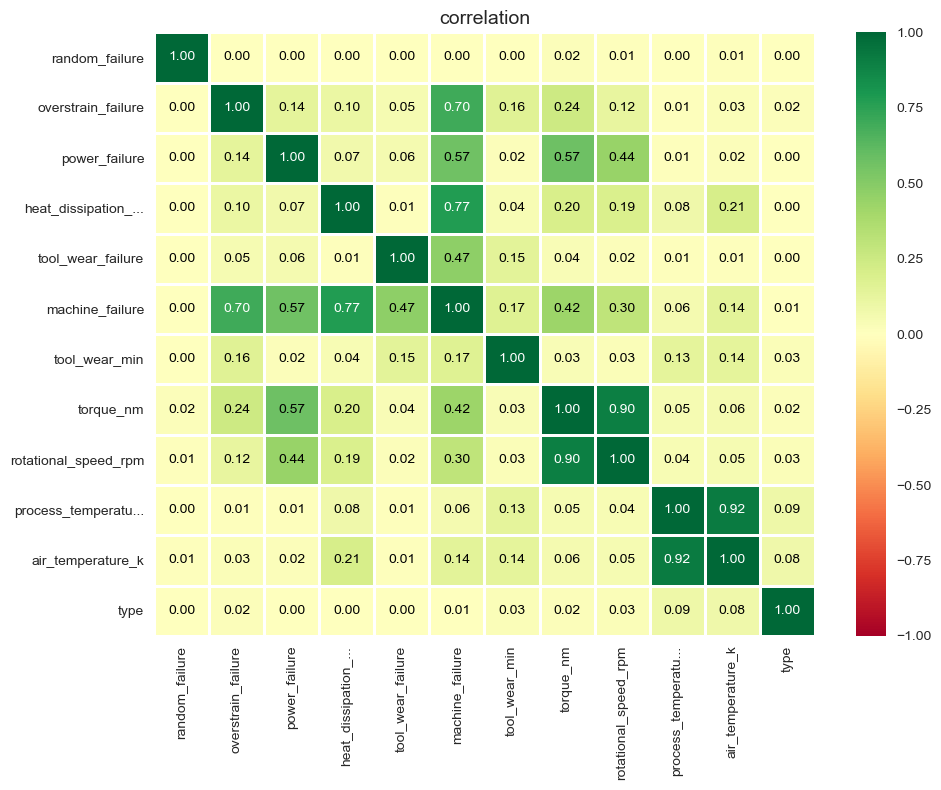

In [21]:
# Построим матрицу корреляции (phik)
corr_matrix = data.phik_matrix(interval_cols=numeric_cols)

plot_correlation_matrix(
    corr_matrix.values,
    x_labels=corr_matrix.columns,
    y_labels=corr_matrix.index,
    figsize=(10, 8)
)

# Анализ корреляций и рекомендации

## 1. Сильная мультиколлинеарность

- **Torque** и **Rotational speed**: **–0.90**  

**Проблема:** может ухудшить стабильность модели

---

## 2. Сильная положительная корреляция

- **Process temperature** и **Air temperature (K)**: **0.92**  
  Температуры связаны

---

## 3. Целевая переменная Machine failure

### 3.1. Корреляции с типами отказов

- **HDF (Heat Dissipation Failure):** 0.77  
- **OSF (Overstrain Failure):** 0.70  
- **PWF (Power Failure):** 0.57  
- **TWF (Tool Wear Failure):** 0.47

### 3.2. Корреляции с техническими параметрами

- **Torque_Nm:** 0.42  
- **Rotational speed:** 0.30  
- **Tool wear:** 0.17  
- **Температуры:** слабые корреляции (0.06–0.14)

---

## 4. Драйверы различных типов отказов

- **HDF:** связана с температурами (φK до 0.21) — тепловой режим.  
- **PWF:** связана с Torque_nm (0.57) и Rotational_speed_rpm (0.44) — режим нагрузки и мощности.  
- **OSF:** умеренная связь с Torque_nm (~0.24) — перегрузка.  
- **TWF:** связана с Tool_wear_min (~0.15) — накопленный износ.  
- **RNF:** практически не связан ни с одним параметром.
Разные типы отказов имеют разные физические причины.

---

# Итоговые выводы

- Torque [Nm] и Rotational speed [rpm] заметно коррелируют с отказами и между собой — это логично, так как их произведение даёт мощность.
- Tool wear [min] умеренно связан с отказами — накопленный износ.
- Флаги типов отказов (TWF, HDF, PWF, OSF, RNF) сильно коррелируют с Machine failure — они описывают причину уже произошедшего отказа, а не входные параметры, доступные заранее. Использовать их как признаки для предсказания будущего отказа нельзя: это утечка таргета.
Далее эти флаги не будем использовать как признаки при построении модели логистической регрессии.

# Предположения для моделирования (обоснование для Feature Engineering)

## 1. Объединить сильно коррелирующие признаки

**Мощность:**


Power = Rotational speed [rpm] * Torque [Nm]


Произведение момента на угловую скорость — это мощность. Высокая мощность = высокая нагрузка на систему.
Признак "power" позволяет объединить два важных параметра в один - выявить критические режимы работы, которые не очевидны при раздельном анализе

**Разность температур:**


Temperature_diff = Process temperature [K] - Air temperature [K]



Это мера перегрева оборудования относительно окружающей среды. Высокая разность может указывать на проблемы с охлаждением.


## 2. Взаимодействия между параметрами и типами отказов
**Взаимодействие нагрузки и износа:**


Torque_wear = Torque [Nm] * Tool wear [min]

Даже умеренная нагрузка может быть опасна при большом износе инструмента. Этот признак моделирует «нагрузку, накопленную во времени».
Признак `torque_Wear_interaction` отражает ситуацию, когда **одновременно высоки и нагрузка (Torque), и износ (Tool wear)**.  
По отдельности высокий torque или высокий износ ещё не гарантируют отказ, но их комбинация резко повышает риск поломки.
Для логистической регрессии такая interaction-фича позволяет поймать нелинейный эффект, который иначе модель не увидит.


При этом не торопимся удалять исходные признаки Torque и Rotational speed — последующие модели (RandomForest, GradientBoosting, LightGBM) могут использовать в разбиениях исходные переменные иначе, чем их произведение. Далее мы отдельно сравним качество моделей с исходными признаками и без них.


In [22]:
# 1. Создаем инженерные признаки

# Физическая формула мощности для вращательного движения
# Мощность = Крутящий момент × Угловая скорость
data["power"] = data["torque_nm"] * data["rotational_speed_rpm"] # агрегированная нагрузка

# Разность температур
data["temperature_difference"] = data["process_temperature_k"] - data["air_temperature_k"]  

# Взаимодействие нагрузки и износа
data["torque_wear_interaction"] = data["torque_nm"] * data["tool_wear_min"] # риск при нагрузке+износе

# 2. Обновляем список числовых признаков
numeric_cols = [
    "air_temperature_k",
    "process_temperature_k",
    "temperature_difference",
    "tool_wear_min",
    "power",
    "torque_wear_interaction",
    "rotational_speed_rpm",
    "torque_nm"
]

# 3. Приводим числовые признаки к float32
for col in numeric_cols:
    data[col] = data[col].astype("float32")

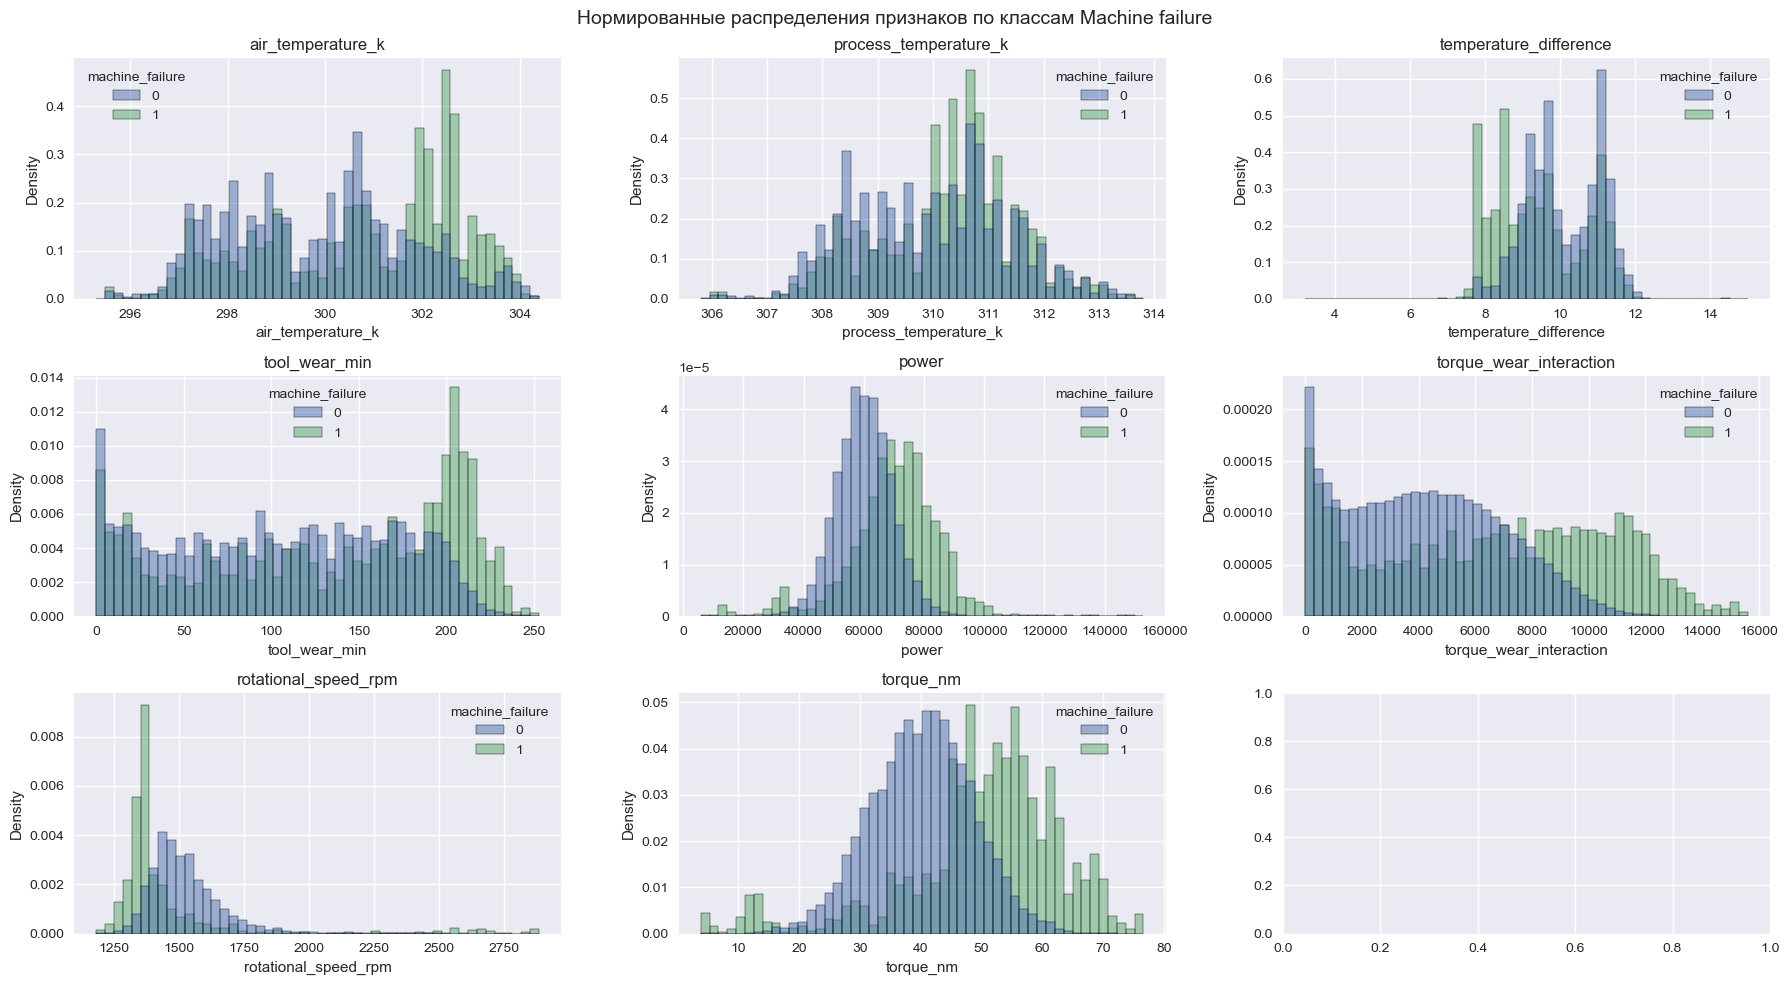

In [23]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
axes = axes.ravel()

for ax, col in zip(axes, numeric_cols):
    sns.histplot(
        data=data,
        x=col,
        hue='machine_failure',
        stat="density",         # нормировка
        common_norm=False,      # отдельная нормировка для каждого класса
        kde=False,
        ax=ax,
        bins=50,
    )
    ax.set_title(col)

fig.suptitle("Нормированные распределения признаков по классам Machine failure", fontsize=14)
plt.tight_layout()
plt.show()

### Краткие выводы по распределениям инженерных признаков

- **power**  
  Агрегированная нагрузка (torque × rotational_speed).  
  У отказов виден небольшой, но стабильный сдвиг в сторону более высоких значений → нагрузка машины всё же влияет на риск выхода из строя.

- **temperature_difference**  
  Разница между температурой процесса и температурой воздуха.  
  У наблюдений с отказами температурный перепад выше → признак хорошо улавливает эффект перегрева и потенциальных проблем с охлаждением.

- **torque_wear_interaction**  
  Взаимодействие нагрузки и износа инструмента.  
  Значения у отказов гораздо выше, чем у нормальных наблюдений → это самый сильный сигнал среди инженерных признаков. Хорошо моделирует «накопленную» нагрузку при изношенном инструменте.

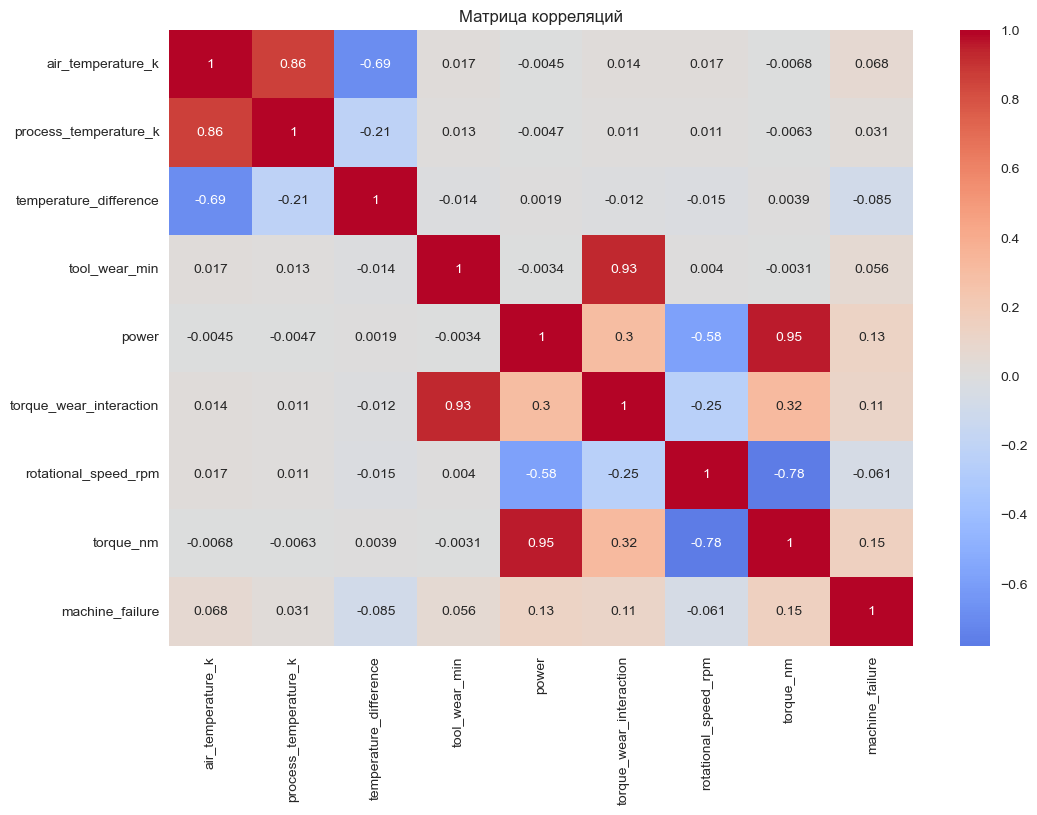

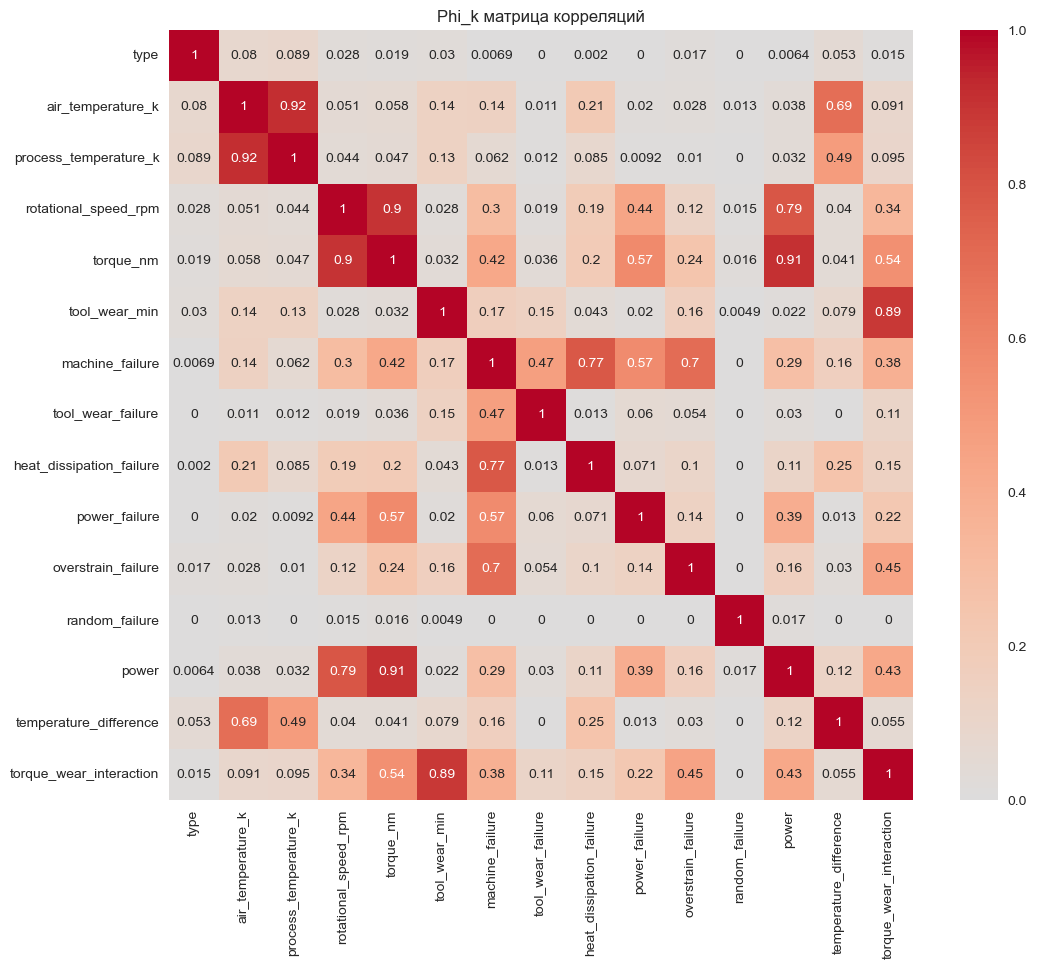

In [24]:
# Матрица корреляций
plt.figure(figsize=(12, 8))
correlation_matrix = data[numeric_cols + ['machine_failure']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')
plt.show()

# Phi_k корреляция для категориальных и числовых признаков
if 'phik' in locals():
    phik_matrix = data.phik_matrix(interval_cols=numeric_cols)
    plt.figure(figsize=(12, 10))
    sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Phi_k матрица корреляций')
    plt.show()

## 4. Общий вывод по результатам исследования


Матрица корреляций показывает, что:

- Явных сильных связей между базовыми параметрами и отказами немного - признаки в целом независимы, что хорошо для моделирования.
- Power и Torque_Wear_interaction умеренно связаны с Machine failure (0.29 и 0.38), что подтверждает влияние нагрузки и её сочетания с износом.
- Tool_wear_min и Torque_Wear_interaction ожидаемо сильно коррелируют (0.89) - interaction-фича отражает реальную физику процесса.
- Temperature_difference заметно связана с Process_temperature_k (0.49), что логично.
- Признак Type почти не связан с другими параметрами, что говорит о его независимости как категориального фактора.

В целом данные показывают, что различные характеристики оборудования влияют на отказы по-разному, и комбинированные признаки (Power, Torque×Wear) дают более сильные сигналы, чем отдельные параметры. Это подтверждает необходимость использования взаимодействий и инженерии признаков.


## 5. Построение модели логистической регрессии

## Выбор метрики

В задаче прогнозирования отказов оборудования основная цель — минимизировать количество пропущенных отказов.
Это связано с тем, что ошибка типа False Negative (модель говорит, что отказа не будет, но он произойдёт) может приводить к простоям, авариям, убыткам и угрозе безопасности.

Поэтому ключевой метрикой качества является Recall (чувствительность), показывающая долю корректно обнаруженных отказов среди всех реальных отказов.
Recall напрямую отвечает на вопрос: «Какую часть возможных аварий модель успела предсказать?»

Ошибки типа False Positive (ложные тревоги) менее критичны — они лишь вызывают дополнительную проверку оборудования. Поэтому Precision и F1-score используются как вспомогательные метрики, но основной показатель — именно Recall, обеспечивающий максимальное покрытие реальных отказов.

In [25]:
# Удаляем флаги отказов 
df = data.drop(columns=[
    "tool_wear_failure", "heat_dissipation_failure", "power_failure", "overstrain_failure", "random_failure"
])

# Проведём обычное случайное разбиение на тренировочную и тестовую выборки без стратификации:
X, y = df.drop('machine_failure', axis=1), df['machine_failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=777)

print('Тренировочная выборка:\n', y_train.value_counts(normalize=True), sep='')
print('Тестовая выборка:\n', y_test.value_counts(normalize=True), sep='')

df.info()

Тренировочная выборка:
machine_failure
0    0.984255
1    0.015745
Name: proportion, dtype: float64
Тестовая выборка:
machine_failure
0    0.984256
1    0.015744
Name: proportion, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   type                     136429 non-null  category
 1   air_temperature_k        136429 non-null  float32 
 2   process_temperature_k    136429 non-null  float32 
 3   rotational_speed_rpm     136429 non-null  float32 
 4   torque_nm                136429 non-null  float32 
 5   tool_wear_min            136429 non-null  float32 
 6   machine_failure          136429 non-null  int8    
 7   power                    136429 non-null  float32 
 8   temperature_difference   136429 non-null  float32 
 9   torque_wear_interaction  136429 non-null  float32 
dtypes: category(1), f

Мы знаем, что в данных наблюдается сильный дисбаланс классов для целевой переменной machine_failure.

На первом этапе построим простую модель логистической регрессии без стратификации.

### Простая модель: Logistic Regression на сырых данных

=== Model 1: Simple Logistic Regression (L2, no class_weight) ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     33571
           1       0.68      0.03      0.05       537

    accuracy                           0.98     34108
   macro avg       0.83      0.51      0.52     34108
weighted avg       0.98      0.98      0.98     34108



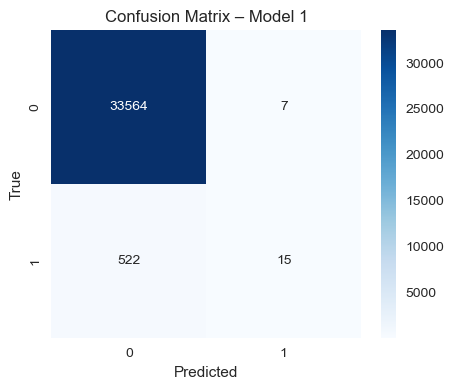


=== Cross-Validation Recall ===
Recall по фолдам: [0.05263158 0.02173913 0.04037267 0.04037267 0.03416149]
Средний recall: 0.03785550833605754
Std recall: 0.010043782948683811

=== Logistic Regression + CV Report ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    100710
           1       0.69      0.04      0.07      1611

    accuracy                           0.98    102321
   macro avg       0.84      0.52      0.53    102321
weighted avg       0.98      0.98      0.98    102321



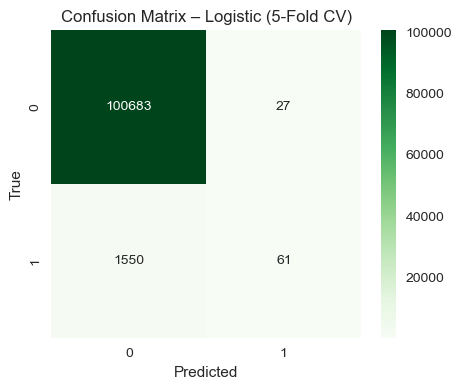

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# === ФИЧИ ===
numeric_features = [
    'air_temperature_k', 'process_temperature_k',
    'rotational_speed_rpm', 'torque_nm',
    'tool_wear_min'
]
categorical_features = ['type']

# === ПРЕПРОЦЕССИНГ ===
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ]
)

# === МОДЕЛЬ ===
logreg_simple = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('logistic', LogisticRegression(
        random_state=42,
        max_iter=2000
    ))
])

# === ОБУЧЕНИЕ НА ТРЕЙНЕ ===
logreg_simple.fit(X_train, y_train)
y_pred_simple = logreg_simple.predict(X_test)

print("=== Model 1: Simple Logistic Regression (L2, no class_weight) ===")
print(classification_report(y_test, y_pred_simple))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_simple),
            annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Model 1")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# ========================================================
# === КРОСС-ВАЛИДАЦИЯ (5-fold) ============================
# ========================================================

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# === 1. Recall по фолдам ===
cv_recall_scores = cross_val_score(
    logreg_simple,
    X_train,
    y_train,
    cv=cv,
    scoring='recall',
    n_jobs=-1
)

print("\n=== Cross-Validation Recall ===")
print("Recall по фолдам:", cv_recall_scores)
print("Средний recall:", cv_recall_scores.mean())
print("Std recall:", cv_recall_scores.std())

# === 2. Полный classification_report после CV ===
y_pred_cv = cross_val_predict(
    logreg_simple,
    X_train,
    y_train,
    cv=cv,
    n_jobs=-1
)

print("\n=== Logistic Regression + CV Report ===")
print(classification_report(y_train, y_pred_cv))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_train, y_pred_cv),
            annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix – Logistic (5-Fold CV)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


#### Выводы

Первая, максимально простая модель с проверкой на кроссвалидации демонстрирует низкую способность выявлять редкие отказы (Recall = 0.05). Она практически не выдаёт ложных тревог, но пропускает 95% реальных отказов, что делает её непригодной для прогнозирования отказов оборудования. Однако она служит важным baseline, с которым будут сравниваться улучшенные модели: с балансировкой классов, Regularization ElasticNet, улучшенными признаками и оптимальным порогом вероятности.

### Простая модель: Logistic Regression на данных с добавлением признаков

=== Model 1: Simple Logistic Regression (L2, no class_weight) ===
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     33571
           1       0.61      0.07      0.13       537

    accuracy                           0.98     34108
   macro avg       0.80      0.54      0.56     34108
weighted avg       0.98      0.98      0.98     34108



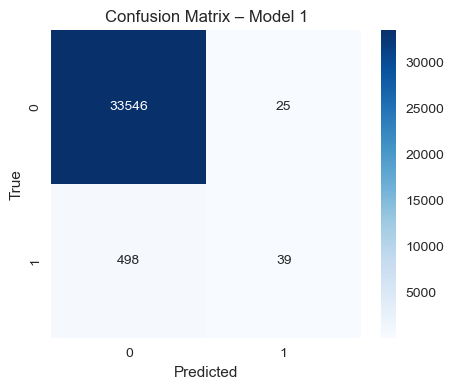


=== Cross-Validation Recall ===
Recall по фолдам: [0.13931889 0.08074534 0.09937888 0.09937888 0.09627329]
Средний recall: 0.10301905659288886
Std recall: 0.01942062325034822

=== Logistic Regression + CV Report ===
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    100710
           1       0.66      0.10      0.18      1611

    accuracy                           0.99    102321
   macro avg       0.82      0.55      0.59    102321
weighted avg       0.98      0.99      0.98    102321



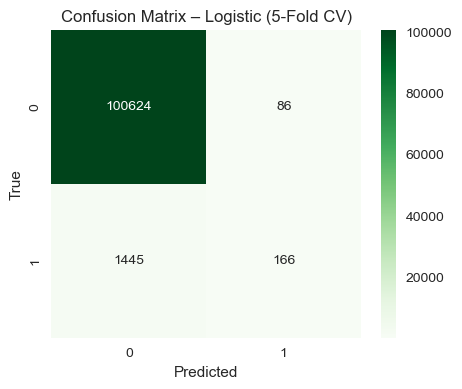

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_features = [
    'air_temperature_k', 'process_temperature_k',
    'rotational_speed_rpm', 'torque_nm',
    'tool_wear_min', 'power', 'temperature_difference',
    'torque_wear_interaction'
]
categorical_features = ['type']

# === ПРЕПРОЦЕССИНГ ===
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ]
)

# === МОДЕЛЬ ===
logreg_simple = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('logistic', LogisticRegression(
        random_state=42,
        max_iter=2000
    ))
])

# === ОБУЧЕНИЕ НА ТРЕЙНЕ ===
logreg_simple.fit(X_train, y_train)
y_pred_simple = logreg_simple.predict(X_test)

print("=== Model 1: Simple Logistic Regression (L2, no class_weight) ===")
print(classification_report(y_test, y_pred_simple))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_simple),
            annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Model 1")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# ========================================================
# === КРОСС-ВАЛИДАЦИЯ (5-fold) ============================
# ========================================================

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# === 1. Recall по фолдам ===
cv_recall_scores = cross_val_score(
    logreg_simple,
    X_train,
    y_train,
    cv=cv,
    scoring='recall',
    n_jobs=-1
)

print("\n=== Cross-Validation Recall ===")
print("Recall по фолдам:", cv_recall_scores)
print("Средний recall:", cv_recall_scores.mean())
print("Std recall:", cv_recall_scores.std())

# === 2. Полный classification_report после CV ===
y_pred_cv = cross_val_predict(
    logreg_simple,
    X_train,
    y_train,
    cv=cv,
    n_jobs=-1
)

print("\n=== Logistic Regression + CV Report ===")
print(classification_report(y_train, y_pred_cv))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_train, y_pred_cv),
            annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix – Logistic (5-Fold CV)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#### Выводы

Добавление инженерных признаков заметно улучшило способность модели распознавать будущие отказы оборудования. Recall и F1-score выросли почти в 2 раза, что подтверждает значимость физических производных параметров (температурная разница, мощность и взаимодействие момента с износом). Тем не менее простой линейной модели всё ещё недостаточно для эффективного обнаружения редких отказов, и дальнейшие улучшения требуют балансировки классов, регуляризации ElasticNet и подбора гиперпараметров.

## Поработаем с дисбалансом классов

### StratifiedKFold

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
print('Тренировочная выборка:\n', y_train.value_counts(normalize=True), sep='')
print('Тестовая выборка:\n', y_test.value_counts(normalize=True), sep='')

Тренировочная выборка:
machine_failure
0    0.984255
1    0.015745
Name: proportion, dtype: float64
Тестовая выборка:
machine_failure
0    0.984256
1    0.015744
Name: proportion, dtype: float64


In [29]:
from sklearn.model_selection import StratifiedKFold

# 1. Убедимся, что целевая переменная — int
y_train = y_train.astype(int)

# 2. Определяем типы признаков
numeric_features = [
    'air_temperature_k', 'process_temperature_k',
    'rotational_speed_rpm', 'torque_nm',
    'tool_wear_min', 'power', 'temperature_difference',
    'torque_wear_interaction'
]

categorical_features = ['type']

# 3. Трансформер: нормируем числовые, кодируем категориальные
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ]
)

# 4. Пайплайн
pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('logisticregression', LogisticRegression(
        random_state=42,
        penalty='elasticnet',
        solver='saga',
        max_iter=20000,
        n_jobs=-1
    ))
])


# 5. CV-стратегия
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 6. Параметры для GridSearch
param_grid = {
    'logisticregression__l1_ratio': np.linspace(0, 1, 10),
    'logisticregression__C': np.logspace(-2, 2, 8)
}

# 7. GridSearchCV
gs = GridSearchCV(
    pipeline,
    param_grid,
    cv=skf,
    scoring='recall',
    n_jobs=-1
)

gs.fit(X_train, y_train)

print(f'Лучшие параметры: {gs.best_params_}')
print(f'Лучшая recall на CV: {gs.best_score_}')

Лучшие параметры: {'logisticregression__C': np.float64(7.196856730011514), 'logisticregression__l1_ratio': np.float64(0.0)}
Лучшая recall на CV: 0.10676598386095593


              precision    recall  f1-score   support

           0       0.99      1.00      0.99    100710
           1       0.66      0.11      0.18      1611

    accuracy                           0.99    102321
   macro avg       0.82      0.55      0.59    102321
weighted avg       0.98      0.99      0.98    102321



<Axes: >

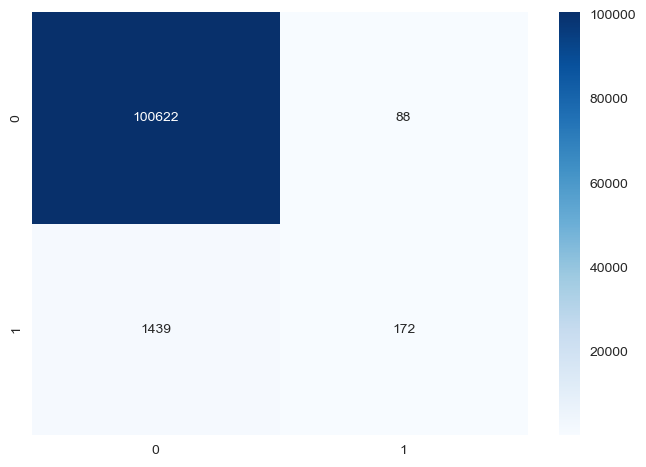

In [30]:
# Получаем предсказания на кросс-валидации
y_pred = cross_val_predict(gs.best_estimator_, X_train, y_train, cv=skf, n_jobs=-1)

# Строим отчет о классификации
report = classification_report(y_train, y_pred)
print(report)

sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='d', cmap='Blues')

Как и все предыдущие модели, последняя показывает очень высокую общую accuracy (~0.99), это связано с сильным дисбалансом классов.
Accuracy не отражает реального качества для редкого класса. Модель дает такое качество при константном прогнозе.

Анализ отчёта классификации и матрицы ошибок показывает, что модель почти всегда предсказывает класс 0 и находит лишь около 11% поломок (recall = 0.11).
Большинство случаев класса 1 остаются нераспознанными: 1439 из 1611 реальных поломок классифицируются как норма, что делает текущую модель непригодной для задач выявления дефектов.

### Смещение порога

In [31]:
from sklearn.metrics import recall_score, precision_score, f1_score

# Нас интересует только вероятность класса (второй столбец)
y_proba_pred = cross_val_predict(gs.best_estimator_, X_train, y_train, cv=skf, method='predict_proba')[:, 1]

# Для удобства завернём numpy-массив в Pandas Series
y_proba_pred = pd.Series(y_proba_pred)

# Создадим списки, в которых будем хранить значения метрик
recall_scores = []
precision_scores = []
f1_scores = []

# Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)

# В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #Пациентов, для которых вероятность наличия диабета > threshold, относим к классу 1
    #В противном случае — к классу 0
    y_pred = y_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores.append(recall_score(y_train, y_pred))
    precision_scores.append(precision_score(y_train, y_pred))
    f1_scores.append(f1_score(y_train, y_pred))


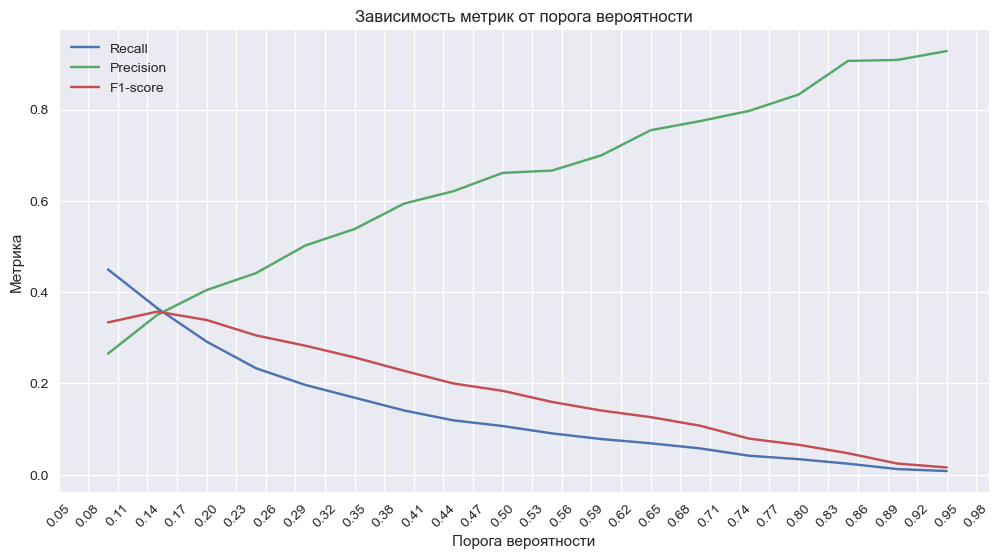

In [32]:
# Строим линейный график зависимости recall от threshold
plt.figure(figsize=(12, 6))
plt.plot(thresholds, recall_scores, label='Recall')
# Строим линейный график зависимости precision от threshold
plt.plot(thresholds, precision_scores, label='Precision')
# Строим линейный график зависимости F1 от threshold
plt.plot(thresholds, f1_scores, label='F1-score')

plt.title('Зависимость метрик от порога вероятности')
plt.xlabel('Порога вероятности')
plt.ylabel('Метрика')
plt.xticks(thresholds)
plt.xticks(np.arange(0.05, 1, 0.03), rotation=45)
plt.grid(True)
plt.legend()

График демонстрирует, как метрики модели ведут себя при изменении порога вероятности классификации отказов оборудования. При низких порогах модель помечает как «отказ» почти все наблюдения — поэтому Recall высокий, но Precision низкий, так как появляется много ложных срабатываний (модель слишком часто «подозревает» отказ). С увеличением порога Precision начинает расти — модель становится строже и чаще правильно определяет реальные отказы, уменьшая количество ложных тревог. Однако при этом Recall падает, так как часть настоящих отказов модель перестаёт замечать. F1-мера достигает максимума примерно в диапазоне порога 0.15–0.2, что показывает лучший баланс между обнаружением реальных отказов и количеством ложноположительных предсказаний. Для задач технического обслуживания (predictive maintenance) часто важнее высокий Recall, но оптимальный выбор порога зависит от стоимости пропуска реального отказа и стоимости ложной тревоги.

In [33]:
#Задаём оптимальный порог вероятностей
threshold_opt = 0.16
#Оборудование, для которого вероятность отказа > 0.15, относим к классу 1
#В противном случае — к классу 0
y_pred_opt = y_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(classification_report(y_train, y_pred_opt))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    100710
           1       0.36      0.35      0.35      1611

    accuracy                           0.98    102321
   macro avg       0.68      0.67      0.67    102321
weighted avg       0.98      0.98      0.98    102321



Мы выбрали порог около 0.16, потому что именно в этом диапазоне по графику достигается лучший баланс между Recall и Precision: 
F1-мера находится на максимуме, Recall остаётся достаточно высоким, 
чтобы не пропускать важные случаи, а Precision заметно выше, чем при низких порогах, что снижает количество ложных тревог. 
Такой порог даёт оптимальное качество модели для задачи, где важны и обнаружение положительных случаев, и умеренный уровень ошибок.

### Взвешиваение классов

In [34]:
from sklearn.model_selection import StratifiedKFold

# 1. Убедимся, что целевая переменная — int
y_train = y_train.astype(int)

# 2. Определяем типы признаков
numeric_features = [
    'air_temperature_k', 'process_temperature_k',
    'rotational_speed_rpm', 'torque_nm',
    'tool_wear_min', 'power', 'temperature_difference',
    'torque_wear_interaction'
]

categorical_features = ['type']

# 3. Трансформер: нормируем числовые, кодируем категориальные
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ]
)

# 4. Пайплайн
pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('logisticregression', LogisticRegression(
        random_state=42,
        penalty='elasticnet',
        solver='saga',
        max_iter=2000,
        n_jobs=1,
        class_weight='balanced'
    ))
])


# 5. CV-стратегия
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 6. Параметры для GridSearch
param_grid = {
    'logisticregression__l1_ratio': np.linspace(0, 1, 10),
    'logisticregression__C': np.logspace(-2, 2, 8)
}

# 7. GridSearchCV
gs = GridSearchCV(
    pipeline,
    param_grid,
    cv=skf,
    scoring='recall',
    n_jobs=-1,
    verbose=2
)

gs.fit(X_train, y_train)

print(f'Лучшие параметры: {gs.best_params_}')
print(f'Лучшая recall на CV: {gs.best_score_}')

Fitting 3 folds for each of 80 candidates, totalling 240 fits


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=0.0; total time=  25.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=0.0; total time=  25.7s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=0.0; total time=  25.9s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=0.1111111111111111; total time=  31.7s
[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=0.2222222222222222; total time=  31.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=0.3333333333333333; total time=  31.7s
[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=0.2222222222222222; total time=  31.9s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=0.1111111111111111; total time=  32.1s
[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=0.1111111111111111; total time=  32.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=0.2222222222222222; total time=  34.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=0.3333333333333333; total time=  31.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=0.3333333333333333; total time=  31.8s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=0.4444444444444444; total time=  32.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=0.4444444444444444; total time=  30.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=0.4444444444444444; total time=  32.1s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=0.5555555555555556; total time=  32.1s
[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=0.5555555555555556; total time=  32.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=0.6666666666666666; total time=  29.9s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=0.5555555555555556; total time=  32.9s
[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=0.6666666666666666; total time=  32.7s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=0.7777777777777777; total time=  25.4s
[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=0.0; total time=   0.7s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=1.0; total time=  25.0s
[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=0.7777777777777777; total time=  27.7s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=1.0; total time=  25.1s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=0.1111111111111111; total time=   1.0s
[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=0.7777777777777777; total time=  33.5s
[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=0.2222222222222222; total time=   1.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=0.6666666666666666; total time=  36.4s
[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=0.2222222222222222; total time=   1.5s
[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=0.0; total time=  10.1s
[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=0.1111111111111111; total time=   5.1s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=1.0; total time=  30.8s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=0.8888888888888888; total time=  32.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=0.8888888888888888; total time=  32.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.01, logisticregression__l1_ratio=0.8888888888888888; total time=  32.8s
[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=0.3333333333333333; total time=   3.9s
[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=0.3333333333333333; total time=   4.5s
[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=0.5555555555555556; total time=   4.0s
[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=0.4444444444444444; total time=  12.1s
[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=0.4444444444444444; total time=  18.8s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=0.0; total time=  26.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=0.1111111111111111; total time=  29.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=0.2222222222222222; total time=  32.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=0.4444444444444444; total time=  29.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=0.3333333333333333; total time=  32.1s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=0.5555555555555556; total time=  29.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=0.5555555555555556; total time=  31.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=0.6666666666666666; total time=  33.9s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=0.6666666666666666; total time=  33.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=0.7777777777777777; total time=  31.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=0.6666666666666666; total time=  33.7s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=0.7777777777777777; total time=  28.6s
[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=0.0; total time=   4.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=0.8888888888888888; total time=  30.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=0.7777777777777777; total time=  31.1s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=0.8888888888888888; total time=  30.7s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=1.0; total time=  30.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=0.8888888888888888; total time=  34.1s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=1.0; total time=  29.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.0372759372031494, logisticregression__l1_ratio=1.0; total time=  29.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=0.0; total time=  24.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=0.0; total time=  25.9s
[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=0.2222222222222222; total time=  18.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=0.1111111111111111; total time=  34.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=0.1111111111111111; total time=  31.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=0.2222222222222222; total time=  30.1s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=0.1111111111111111; total time=  34.1s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=0.2222222222222222; total time=  33.1s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=0.3333333333333333; total time=  31.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=0.3333333333333333; total time=  27.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=0.4444444444444444; total time=  27.7s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=0.3333333333333333; total time=  33.1s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=0.4444444444444444; total time=  33.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=0.5555555555555556; total time=  25.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=0.6666666666666666; total time=  24.7s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=0.5555555555555556; total time=  33.8s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=0.4444444444444444; total time=  36.7s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=0.5555555555555556; total time=  34.6s
[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=0.6666666666666666; total time=  25.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=0.6666666666666666; total time=  34.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=0.7777777777777777; total time=  27.8s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=0.7777777777777777; total time=  33.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=0.8888888888888888; total time=  26.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=0.7777777777777777; total time=  33.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=0.8888888888888888; total time=  27.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=0.8888888888888888; total time=  31.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=1.0; total time=  27.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=1.0; total time=  31.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=0.0; total time=  25.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.13894954943731375, logisticregression__l1_ratio=1.0; total time=  30.9s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=0.0; total time=  24.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=0.0; total time=  25.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=0.1111111111111111; total time=  32.1s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=0.1111111111111111; total time=  32.8s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=0.1111111111111111; total time=  28.8s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=0.2222222222222222; total time=  25.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=0.3333333333333333; total time=  27.3s
[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=0.3333333333333333; total time=  25.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=0.2222222222222222; total time=  32.9s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=0.2222222222222222; total time=  32.9s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=0.3333333333333333; total time=  32.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=0.4444444444444444; total time=  33.1s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=0.4444444444444444; total time=  32.1s
[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=0.4444444444444444; total time=  31.3s
[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=0.5555555555555556; total time=  24.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=0.6666666666666666; total time=  25.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=0.5555555555555556; total time=  32.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=0.5555555555555556; total time=  34.8s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=0.6666666666666666; total time=  32.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=0.6666666666666666; total time=  32.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=0.7777777777777777; total time=  31.9s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=0.7777777777777777; total time=  31.9s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=0.7777777777777777; total time=  28.8s
[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=0.8888888888888888; total time=  28.7s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=0.8888888888888888; total time=  29.1s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=1.0; total time=  29.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=0.0; total time=  21.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=0.8888888888888888; total time=  36.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=0.0; total time=  23.1s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=0.0; total time=  20.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=1.0; total time=  33.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=0.517947467923121, logisticregression__l1_ratio=1.0; total time=  33.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=0.2222222222222222; total time=  25.1s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=0.2222222222222222; total time=  24.9s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=0.1111111111111111; total time=  33.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=0.1111111111111111; total time=  33.9s
[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=0.1111111111111111; total time=  33.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=0.3333333333333333; total time=  25.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=0.3333333333333333; total time=  30.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=0.2222222222222222; total time=  35.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=0.3333333333333333; total time=  32.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=0.4444444444444444; total time=  35.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=0.4444444444444444; total time=  26.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=0.4444444444444444; total time=  28.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=0.5555555555555556; total time=  28.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=0.5555555555555556; total time=  31.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=0.5555555555555556; total time=  31.8s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=0.6666666666666666; total time=  35.1s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=0.6666666666666666; total time=  28.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=0.7777777777777777; total time=  29.1s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=0.6666666666666666; total time=  34.9s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=0.7777777777777777; total time=  30.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=0.7777777777777777; total time=  30.8s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=0.8888888888888888; total time=  28.9s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=0.8888888888888888; total time=  28.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=1.0; total time=  30.8s
[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=0.8888888888888888; total time=  31.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=1.0; total time=  27.7s
[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=0.0; total time=  25.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1.9306977288832496, logisticregression__l1_ratio=1.0; total time=  30.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=0.0; total time=  26.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=0.1111111111111111; total time=  25.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=0.0; total time=  29.9s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=0.1111111111111111; total time=  28.8s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=0.1111111111111111; total time=  33.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=0.2222222222222222; total time=  27.9s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=0.2222222222222222; total time=  31.6s
[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=0.2222222222222222; total time=  31.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=0.3333333333333333; total time=  31.7s
[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=0.3333333333333333; total time=  30.7s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=0.3333333333333333; total time=  30.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=0.4444444444444444; total time=  30.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=0.4444444444444444; total time=  30.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=0.4444444444444444; total time=  30.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=0.5555555555555556; total time=  31.9s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=0.6666666666666666; total time=  28.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=0.5555555555555556; total time=  30.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=0.5555555555555556; total time=  30.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=0.6666666666666666; total time=  30.4s
[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=0.6666666666666666; total time=  30.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=0.7777777777777777; total time=  28.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=0.7777777777777777; total time=  29.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=0.7777777777777777; total time=  34.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=0.8888888888888888; total time=  30.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=0.8888888888888888; total time=  30.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=0.0; total time=  23.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=0.0; total time=  23.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=0.8888888888888888; total time=  31.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=1.0; total time=  32.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=1.0; total time=  31.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=7.196856730011514, logisticregression__l1_ratio=1.0; total time=  31.9s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=0.0; total time=  25.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=0.1111111111111111; total time=  31.7s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=0.1111111111111111; total time=  30.1s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=0.1111111111111111; total time=  30.9s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=0.3333333333333333; total time=  25.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=0.2222222222222222; total time=  29.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=0.2222222222222222; total time=  34.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=0.2222222222222222; total time=  31.1s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=0.3333333333333333; total time=  31.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=0.4444444444444444; total time=  27.7s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=0.3333333333333333; total time=  34.1s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=0.5555555555555556; total time=  25.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=0.4444444444444444; total time=  32.8s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=0.5555555555555556; total time=  25.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=0.4444444444444444; total time=  32.9s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=0.5555555555555556; total time=  33.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=0.7777777777777777; total time=  25.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=0.6666666666666666; total time=  33.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=0.6666666666666666; total time=  34.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=0.6666666666666666; total time=  33.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=0.7777777777777777; total time=  33.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=0.7777777777777777; total time=  26.7s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=0.8888888888888888; total time=  26.8s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=0.8888888888888888; total time=  28.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=1.0; total time=  26.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=0.8888888888888888; total time=  32.8s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=0.0; total time=  24.1s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=1.0; total time=  33.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=26.826957952797247, logisticregression__l1_ratio=1.0; total time=  31.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=0.0; total time=  29.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=0.0; total time=  25.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=0.2222222222222222; total time=  25.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=0.1111111111111111; total time=  33.1s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=0.1111111111111111; total time=  33.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=0.1111111111111111; total time=  33.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=0.2222222222222222; total time=  25.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=0.2222222222222222; total time=  33.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=0.3333333333333333; total time=  25.9s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=0.3333333333333333; total time=  31.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=0.3333333333333333; total time=  33.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=0.4444444444444444; total time=  33.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=0.4444444444444444; total time=  27.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=0.5555555555555556; total time=  26.8s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=0.4444444444444444; total time=  33.7s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=0.5555555555555556; total time=  33.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=0.6666666666666666; total time=  26.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=0.5555555555555556; total time=  33.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=0.6666666666666666; total time=  27.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=0.6666666666666666; total time=  32.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=0.7777777777777777; total time=  31.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=0.7777777777777777; total time=  30.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=0.7777777777777777; total time=  27.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=0.8888888888888888; total time=  26.1s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=0.8888888888888888; total time=  25.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=1.0; total time=  25.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=0.8888888888888888; total time=  27.1s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=1.0; total time=  26.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=100.0, logisticregression__l1_ratio=1.0; total time=  24.6s
Лучшие параметры: {'logisticregression__C': np.float64(1.9306977288832496), 'logisticregression__l1_ratio': np.float64(0.3333333333333333)}
Лучшая recall на CV: 0.7957790192427064


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.81      0.90    100710
           1       0.06      0.80      0.12      1611

    accuracy                           0.81    102321
   macro avg       0.53      0.80      0.51    102321
weighted avg       0.98      0.81      0.88    102321



/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<Axes: >

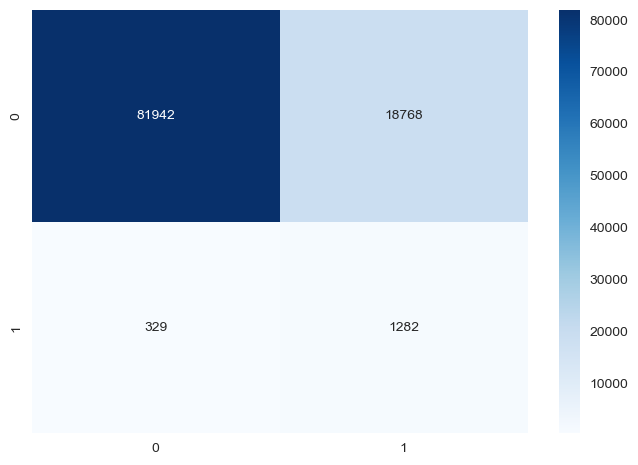

In [35]:
# Получаем предсказания на кросс-валидации
y_pred = cross_val_predict(gs.best_estimator_, X_train, y_train, cv=skf, n_jobs=-1)

# Строим отчет о классификациива
report = classification_report(y_train, y_pred)
print(report)

sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='d', cmap='Blues')

In [36]:
from sklearn.metrics import recall_score, precision_score, f1_score

# Нас интересует только вероятность класса (второй столбец)
y_proba_pred = cross_val_predict(gs.best_estimator_, X_train, y_train, cv=skf, method='predict_proba')[:, 1]

# Для удобства завернём numpy-массив в Pandas Series
y_proba_pred = pd.Series(y_proba_pred)

# Создадим списки, в которых будем хранить значения метрик
recall_scores = []
precision_scores = []
f1_scores = []

# Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)

# В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #Пациентов, для которых вероятность наличия диабета > threshold, относим к классу 1
    #В противном случае — к классу 0
    y_pred = y_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores.append(recall_score(y_train, y_pred))
    precision_scores.append(precision_score(y_train, y_pred))
    f1_scores.append(f1_score(y_train, y_pred))


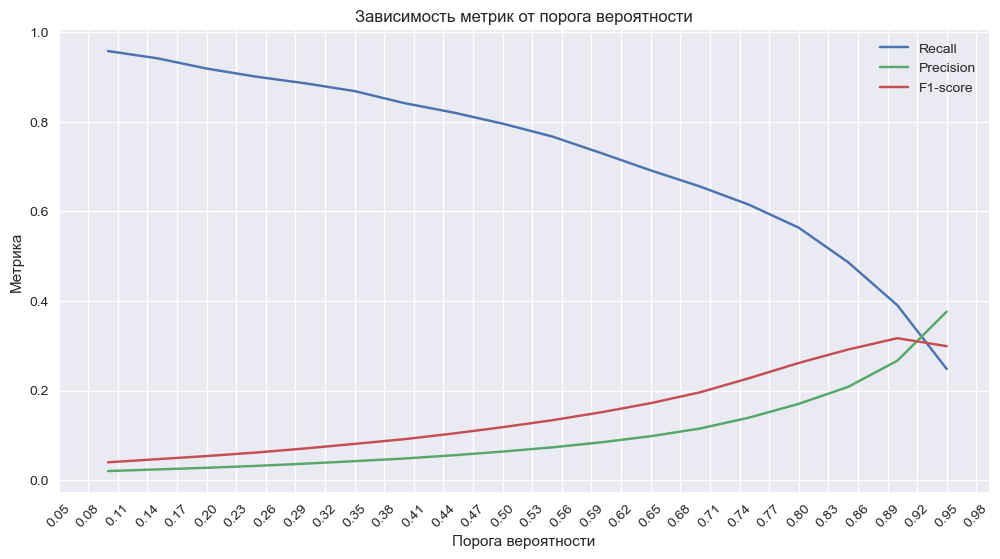

In [37]:
# Строим линейный график зависимости recall от threshold
plt.figure(figsize=(12, 6))
plt.plot(thresholds, recall_scores, label='Recall')
# Строим линейный график зависимости precision от threshold
plt.plot(thresholds, precision_scores, label='Precision')
# Строим линейный график зависимости F1 от threshold
plt.plot(thresholds, f1_scores, label='F1-score')

plt.title('Зависимость метрик от порога вероятности')
plt.xlabel('Порога вероятности')
plt.ylabel('Метрика')
plt.xticks(thresholds)
plt.xticks(np.arange(0.05, 1, 0.03), rotation=45)
plt.grid(True)
plt.legend()

Порог выбран низким (0.1–0.2), что приводит к повышению recall (до ~0.9) и снижению precision до 0.02.
Это соответствует реальным бизнес-требованиям задачи:
стоимость ложноположительного срабатывания минимальна,
тогда как пропуск отказа оборудования вызывает значительные экономические потери и риски.
Поэтому модель оптимизирована на максимальный recall.


In [38]:
#Задаём оптимальный порог вероятностей
threshold_opt = 0.16
#Оборудование, для которого вероятность отказа > 0.15, относим к классу 1
#В противном случае — к классу 0
y_pred_opt = y_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(classification_report(y_train, y_pred_opt))

              precision    recall  f1-score   support

           0       1.00      0.41      0.58    100710
           1       0.02      0.93      0.05      1611

    accuracy                           0.42    102321
   macro avg       0.51      0.67      0.32    102321
weighted avg       0.98      0.42      0.57    102321



### Сэмплирование

#### Downsampling

In [39]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

pipeline_us = make_pipeline(
    StandardScaler(),
    RandomUnderSampler(random_state=42),
    LogisticRegression(random_state=42,
                       penalty='elasticnet',
                       solver='saga')
    )

In [40]:
from collections import Counter

# Баланс классов до семплирования
class_counts = Counter(y_train)
print(class_counts)

# Проверяем баланс классов после применения RandomUnderSampler
X_resampled, y_resampled = pipeline_us[1].fit_resample(X_train, y_train)

# Выводим количество экземпляров каждого класса
class_counts = Counter(y_resampled)
print(class_counts)

Counter({0: 100710, 1: 1611})
Counter({0: 1611, 1: 1611})


In [41]:
gs = GridSearchCV(pipeline_us,
                  param_grid=param_grid,
                  cv=skf,
                  scoring='recall',
                  n_jobs=-1)

gs.fit(X_train, y_train)
print(f'Лучшие параметры: {gs.best_params_}')
print(f'Лучшее качество на кросс-валидации: {gs.best_score_}')

ValueError: 
All the 240 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/anaconda3/lib/python3.13/site-packages/imblearn/pipeline.py", line 518, in fit
    Xt, yt = self._fit(X, y, routed_params, raw_params=params)
             ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/imblearn/pipeline.py", line 430, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ~~~~~~~~~~~~~~~~~~~~~~~~^
        cloned_transformer,
        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
        params=step_params,
        ^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "/opt/anaconda3/lib/python3.13/site-packages/joblib/memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/imblearn/pipeline.py", line 1383, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py", line 921, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ~~~~~~~~^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_data.py", line 894, in fit
    return self.partial_fit(X, y, sample_weight)
           ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_data.py", line 930, in partial_fit
    X = validate_data(
        self,
    ...<4 lines>...
        reset=first_call,
    )
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py", line 2944, in validate_data
    out = check_array(X, input_name="X", **check_params)
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/opt/anaconda3/lib/python3.13/site-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'L'

--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/anaconda3/lib/python3.13/site-packages/imblearn/pipeline.py", line 518, in fit
    Xt, yt = self._fit(X, y, routed_params, raw_params=params)
             ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/imblearn/pipeline.py", line 430, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ~~~~~~~~~~~~~~~~~~~~~~~~^
        cloned_transformer,
        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
        params=step_params,
        ^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "/opt/anaconda3/lib/python3.13/site-packages/joblib/memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/imblearn/pipeline.py", line 1383, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py", line 921, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ~~~~~~~~^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_data.py", line 894, in fit
    return self.partial_fit(X, y, sample_weight)
           ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_data.py", line 930, in partial_fit
    X = validate_data(
        self,
    ...<4 lines>...
        reset=first_call,
    )
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py", line 2944, in validate_data
    out = check_array(X, input_name="X", **check_params)
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/opt/anaconda3/lib/python3.13/site-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'M'


Exception ignored in: <function ResourceTracker.__del__ at 0x105039bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106fd1bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104865bc0>
Traceback (most recent call last

In [ ]:
y_pred = cross_val_predict(gs.best_estimator_, X_train, y_train, cv=skf, n_jobs=-1)
report = classification_report(y_train, y_pred)
print(report)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='d', cmap='Blues')

#### Upsampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

pipeline_os = make_pipeline(StandardScaler(),
                            RandomOverSampler(random_state=42),
                            LogisticRegression(random_state=42,
                                               penalty='elasticnet',
                                               solver='saga')
)

In [ ]:
# Баланс классов до семплирования
class_counts = Counter(y_train)
print(class_counts)

# Проверяем баланс классов после применения RandomUnderSampler
X_resampled, y_resampled = pipeline_os[1].fit_resample(X_train, y_train)

# Выводим количество экземпляров каждого класса
class_counts = Counter(y_resampled)
print(class_counts)

In [ ]:
gs = GridSearchCV(pipeline_os,
                  param_grid=param_grid,
                  cv=skf,
                  scoring='recall',
                  n_jobs=-1)

gs.fit(X_train, y_train)
print(f'Лучшие параметры: {gs.best_params_}')
print(f'Лучшее качество на кросс-валидации: {gs.best_score_:.3f}')

In [ ]:
y_pred = cross_val_predict(gs.best_estimator_, X_train, y_train, cv=skf, n_jobs=-1)
report = classification_report(y_train, y_pred)
print(report)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='d', cmap='Blues')

#### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

pipeline_smote = make_pipeline(
    StandardScaler(),
    SMOTE(random_state=42, k_neighbors=5), # можем сами указать количество соседей
    LogisticRegression(random_state=42,
                       penalty='elasticnet',
                       solver='saga')
    )

In [ ]:
# Баланс классов до семплирования
class_counts = Counter(y_train)
print(class_counts)

# Проверяем баланс классов после применения SMOTE
X_resampled, y_resampled = pipeline_smote[1].fit_resample(X_train, y_train)

# Выводим количество экземпляров каждого класса
class_counts = Counter(y_resampled)
print(class_counts)

In [ ]:
gs = GridSearchCV(pipeline_smote,
                  param_grid=param_grid,
                  cv=skf,
                  scoring='recall',
                  n_jobs=-1)

gs.fit(X_train, y_train)
print(f'Лучшие параметры: {gs.best_params_}')
print(f'Лучшее качество на кросс-валидации: {gs.best_score_:.3f}')


In [ ]:
y_pred = cross_val_predict(gs.best_estimator_, X_train, y_train, cv=skf, n_jobs=-1)
report = classification_report(y_train, y_pred)
print(report)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='d', cmap='Blues')

*Комментарий от Олега для построения будущих моделей*


Скорее не отдельные модели, а свести все причины отказа в один столбец 
(а не в разные, как сейчас). 

Будет мультиклассовая классификация, а не бинарная.